In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility
import math

pd.options.mode.chained_assignment = None 

In [2]:
import dame_flame
import random

## Data Cleaning (CREATING flame_enrollment.csv)

In [3]:
# We start with a dataset that has registry data merged with unequal commute features data (LIFT_registry_UCMerged)

In [4]:
# Before rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

FileNotFoundError: [Errno 2] No such file or directory: '/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv'

In [5]:
# After rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged_new.csv")
LIFT_reg

FileNotFoundError: [Errno 2] No such file or directory: '/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged_new.csv'

In [6]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

NameError: name 'LIFT_reg' is not defined

In [7]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

NameError: name 'LIFT_reg' is not defined

In [8]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

NameError: name 'LIFT_reg' is not defined

In [9]:
sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)
sap

NameError: name 'sap' is not defined

In [10]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

NameError: name 'sap' is not defined

In [11]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

NameError: name 'sap' is not defined

In [12]:
# Condense CardIssuingAgency to the top 5 agencies and and "other" category
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

NameError: name 'sap' is not defined

In [13]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

NameError: name 'sap' is not defined

In [14]:
sap["LanguageSpoken"].value_counts()

NameError: name 'sap' is not defined

In [15]:
top5 = sap.value_counts("LanguageSpoken").index[:5]
top5.tolist()

NameError: name 'sap' is not defined

In [16]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

NameError: name 'sap' is not defined

In [17]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

NameError: name 'sap' is not defined

In [18]:
# bin age.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

NameError: name 'sap' is not defined

In [19]:
sap = sap.loc[:, ~sap.columns.isin(['Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

NameError: name 'sap' is not defined

In [20]:
sap["SAP"].value_counts()

NameError: name 'sap' is not defined

In [21]:
print(8173/17900)

0.4565921787709497


In [22]:
# Create the feature 'count_enroll' to count the number of enrollments per user_id.

sap["stage"] = sap["stage"].astype(int)
sap['count_enroll'] = sap['stage']
sap['count_enroll']
#count_enroll = sap.groupby(["user_id"]).count()[['stage']]
#count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

NameError: name 'sap' is not defined

In [23]:
# sap.groupby(["user_id"]).head()
print(len(sap["user_id"]))
print(len(sap["user_id"].unique()))

NameError: name 'sap' is not defined

In [24]:
# sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows
sap_enrollment = sap
sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

NameError: name 'sap' is not defined

In [25]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

NameError: name 'sap_enrollment' is not defined

In [26]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration', 'duplicate'])]
ds_general

NameError: name 'sap_enrollment' is not defined

In [27]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

NameError: name 'ds_general' is not defined

In [29]:
ds_general.isnull().sum() 

RaceDesc                              0
Initial_Load                          0
id                                    0
OverallJobAccess                      0
lowwagelaborforce                     0
Access30Transit                       0
Access30Transit_ts                    0
MSA                                   0
spatialmismatch                       0
OverallJobAccess_quantileNum_4q       0
lowwagelaborforce_quantileNum_4q      0
Access30Transit_quantileNum_4q        0
Access30Transit_ts_quantileNum_4q     0
spatialmismatch_quantileNum_4q        0
OverallJobAccess_quantileNum_10q      0
lowwagelaborforce_quantileNum_10q     0
Access30Transit_quantileNum_10q       0
Access30Transit_ts_quantileNum_10q    0
spatialmismatch_quantileNum_10q       0
SAP                                   0
Agency                                0
Language                              0
user_id                               0
Age_bin                               0
count_enroll                          0


### Dropping the few rows with na values before running FLAME

In [27]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NaN,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NaN,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [28]:
# Fill in the NA race values, labeling as "Other"
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general["Initial_Load"] = ds_general["Initial_Load"].fillna(value="NA")
ds_general

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,1,1,2,3,0,CCS,English,39120,3,1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count (individuals in SAP)')

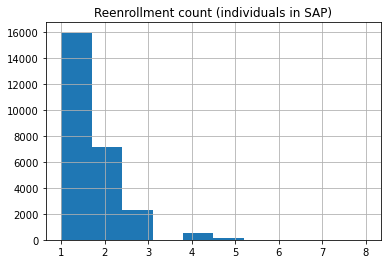

In [108]:
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

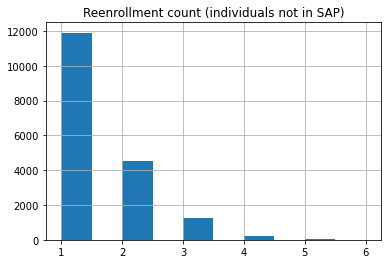

In [109]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

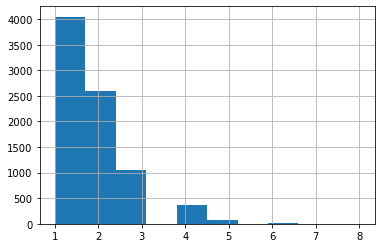

In [110]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()
plt.title('Reenrollment count (enrolled in SAP)')

<AxesSubplot:>

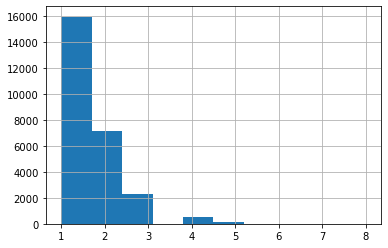

In [111]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

In [30]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,Asian,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,8
1,Black or African American,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,3,6
2,Black or African American,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,English,2,6
3,Black or African American,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,Hispanic or Latino,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,White,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,White,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,White,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,English,3,1


In [31]:
match_all.RaceDesc.value_counts()

White                                        8855
Black or African American                    5209
Asian                                        4057
Hispanic or Latino                           2656
Not Specified                                2429
Other                                        1556
American Indian or Alaska Native              647
Multi-Racial                                  349
Native Hawaiian or Other Pacific Islander     314
Name: RaceDesc, dtype: int64

## Mapping categorical variables to ordinal values for FLAME.

In [32]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,8
1,1,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,3,6
2,1,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,English,2,6
3,1,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,3,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,0,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,0,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,0,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,English,3,1


In [33]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,Subsidized Annual Pass,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,Subsidized Annual Pass,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,NA,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,Subsidized Annual Pass,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,Subsidized Annual Pass,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,NA,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,0,0,1
93563,0,10,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,0,2,1
93572,0,10,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
93598,0,10,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,0,3,1


In [48]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,3,3,3,3,2,1,3,0,2,8
1,1,1,3,3,3,3,2,1,3,0,3,6
2,1,2,3,3,3,3,2,0,5,0,2,6
3,1,1,3,3,3,3,2,1,0,0,4,5
4,3,1,3,3,3,3,2,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,2,2,0,0,0,0,0,0,0,0,1
26068,0,0,0,2,0,0,3,0,4,0,2,1
26069,0,0,0,0,0,0,1,0,1,0,4,1
26070,0,0,0,0,0,0,1,0,3,0,3,1


In [39]:
a = {"10": 0, "Subsidized Annual Pass": 1, "NA": 2, "70": 3, "20": 4, '50': 5,  '15': 6, 'Misc. Pass':7, '30': 8, 'Passport': 9 }
match_all['Initial_Load'] = match_all['Initial_Load'].map(a)
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,2,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,1,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,2,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,0,0,1
93563,0,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,0,2,1
93572,0,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
93598,0,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,0,3,1


In [38]:
match_all['Initial_Load'].value_counts()

10                        15898
Subsidized Annual Pass     8173
NA                         1619
70                          155
20                           76
50                           72
15                           39
Misc. Pass                   31
30                            5
Passport                      4
Name: Initial_Load, dtype: int64

In [40]:
# match_all.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv')  

# FLAME Algorithm For Matching (Starts Here if you have flame_enrollment3.csv)

In [3]:
flame_enr_v3 = '/Users/albertsun/Projects/data/flame_enrollment3.csv' #"/Users/JennyH/cisil-causal-inference/Data/flame_enrollment3.csv"

match_all = pd.read_csv(flame_enr_v3)
match_all = match_all.loc[:, ~match_all.columns.isin(['Unnamed: 0'])]
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,8,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [4]:
match_all = match_all.replace({6: 5, 
                  7:5,
                  8:5})

#match_all.RaceDesc.value_counts() 
# merge the multi-racial, pacific islander, american indian categories into the “other” category 6, 7, 8 -> other 

In [5]:
match_all = match_all.loc[:, ~match_all.columns.isin(['id', 'OverallJobAccess', 'lowwagelaborforce', 'Access30Transit', 'Access30Transit_ts', 'MSA', 'spatialmismatch'])]
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [6]:
# Remove Decile quantiles for now.
match_all = match_all.loc[:, ~match_all.columns.isin([
    'OverallJobAccess_quantileNum_10q', 'lowwagelaborforce_quantileNum_10q', 
    'Access30Transit_quantileNum_10q', 'Access30Transit_ts_quantileNum_10q', 
    'spatialmismatch_quantileNum_10q'])]


In [7]:
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [8]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontreeCV', 
                                            alpha=0.5, 
                                            want_pe=True)

In [9]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1135
	Unmatched treated units:  5241 out of a total of  8172 treated units
	Unmatched control units:  13675 out of a total of  17874 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  7130
	Number of matches made so far:  7130
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  2514
	Unmatched treated units:  1947 out of a total of  8172 treated units
	Unmatched control units:  7967 out of a total of  17874 control units
	Predictive error of covariates chosen this iteration:  0.5143481276128777
	Number of matches made in this iteration:  9002
	Number of matches made so far:  16132
	In this iteration, the covariates dropped are:  Agency
Iteration number:  3
	Number of matched groups formed in total:  3132
	Unmatched treated units:  645 out of a total of  8172 treated units
	Unmatched control 

flame_enrollment2.csv
Unmatched treated units:  0 out of a total of  8173 treated units
Unmatched control units:  136 out of a total of  17899 control units

flame_enrollment3.csv
Unmatched treated units:  0 out of a total of  8172 treated units
Unmatched control units:  1354 out of a total of  17874 control units

# Cate Plots
5-17-2023

In [10]:
match_all

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,1,3,3,3,3,3,2,3,0,2
1,1,0,1,3,3,3,3,2,5,0,2
2,1,1,2,3,3,3,3,2,3,0,3
3,0,0,1,3,3,3,3,2,3,0,4
4,1,1,2,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...
26041,5,0,1,0,0,2,0,0,0,0,0
26042,2,0,1,0,2,0,0,3,4,0,0
26043,0,1,1,0,1,0,1,2,2,0,3
26044,0,1,1,3,0,1,1,0,2,0,2


In [11]:
def get_cates_and_counts(df, column_name: str) -> pd.DataFrame:
    """
    Return pd DataFrame with CATE values and Count Values to plot both
    
    - 'CATE' column has CATE value corresponding to all the units with that value in the column
    - 'Counts' column has the number of all units in the data that are matched to a group that 
    has that specific value, i.e. 1791 individuals/units with matched in a group such that race=White
    """
    cate_unit_count = {}
    cates = {} #{asian: [0.1, 0.3, ..], black: [0.1, 0.3, ..], ...}
    cates_avg = {} #{asian: 4, black: 5, ...}
    
    for val in set(df[column_name].tolist()):
        cates[val] = []
        print(f'Calculating cates for column: {column_name}, for value: {val}')
        for i in df[(df[column_name] == val)].index:
            unit_cate = dame_flame.utils.post_processing.CATE(model_flame_AMT, i)
            if not math.isnan(unit_cate):
                cates[val].append(unit_cate)
                if val not in cate_unit_count:
                    cate_unit_count[val] = 0
                cate_unit_count[val] += 1
        cates_avg[val] = sum(cates[val]) / len(cates[val])
        
    cates_avg_series = pd.Series(cates_avg)
    cate_unit_count_series = pd.Series(cate_unit_count)
    
    num_lvls = df[column_name].value_counts()
    
    frame = {'CATE': cates_avg_series, 
             'Counts': num_lvls,
            'num_units_used': cate_unit_count_series}
    data = pd.DataFrame(frame)
    data.index = data.index.map(str)
    data = data.sort_index() 
    return data

In [12]:
# covariates of interest: 
cols = ['RaceDesc','OverallJobAccess_quantileNum_4q','lowwagelaborforce_quantileNum_4q',
        'Access30Transit_quantileNum_4q','Access30Transit_ts_quantileNum_4q','spatialmismatch_quantileNum_4q',
        'Agency','Language','Age_bin']

df_dic = {}

def export_cate_df(cols: list): 
    """
    Create dictionary where
    - keys are column (i.e. White)
    - values are pandas dataframe (i.e. pandas dataframe created using get_cates_and_counts() that shows CATE
    values and counts)
    """
    for col in cols:
        df_dic[col] = get_cates_and_counts(match_all, col)

export_cate_df(cols)


Calculating cates for column: RaceDesc, for value: 0
Unit 2997 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so can't find the CATE
Unit 4822 does not have any matches, so can't find the CATE
Unit 5232 does not have any matches, so can't find the CATE
Unit 5965 does not have any matches, so can't find the CATE
Unit 5966 does not have any matches, so can't find the CATE
Unit 6168 does not have any matches, so can't find the CATE
Unit 6175 does not have any matches, so can't find the CATE
Unit 6176 does not have any matches, so can't find the CATE
Unit 6180 does not have any matches, so can't find the CATE
Unit 6592 does not have any matches, so can't find the CATE
Unit 6593 does not have any matches, so can't find the CATE
Unit 6595 does not have any matches, so can't find the CATE
Unit 6597 does not have any matches, so can't find the CATE
Unit 6600 does not have any matches, so can't find the CATE
Unit 6602 does not have any matches, so can't f

Unit 19255 does not have any matches, so can't find the CATE
Unit 19256 does not have any matches, so can't find the CATE
Unit 19257 does not have any matches, so can't find the CATE
Unit 19762 does not have any matches, so can't find the CATE
Unit 19767 does not have any matches, so can't find the CATE
Unit 19768 does not have any matches, so can't find the CATE
Unit 19871 does not have any matches, so can't find the CATE
Unit 19876 does not have any matches, so can't find the CATE
Unit 19984 does not have any matches, so can't find the CATE
Unit 20084 does not have any matches, so can't find the CATE
Unit 20088 does not have any matches, so can't find the CATE
Unit 20110 does not have any matches, so can't find the CATE
Unit 20111 does not have any matches, so can't find the CATE
Unit 20184 does not have any matches, so can't find the CATE
Unit 20405 does not have any matches, so can't find the CATE
Unit 20407 does not have any matches, so can't find the CATE
Unit 20414 does not have

Unit 7003 does not have any matches, so can't find the CATE
Unit 7342 does not have any matches, so can't find the CATE
Unit 8112 does not have any matches, so can't find the CATE
Unit 8115 does not have any matches, so can't find the CATE
Unit 8117 does not have any matches, so can't find the CATE
Unit 8149 does not have any matches, so can't find the CATE
Unit 8683 does not have any matches, so can't find the CATE
Unit 8698 does not have any matches, so can't find the CATE
Unit 8701 does not have any matches, so can't find the CATE
Unit 8838 does not have any matches, so can't find the CATE
Unit 8847 does not have any matches, so can't find the CATE
Unit 9314 does not have any matches, so can't find the CATE
Unit 9318 does not have any matches, so can't find the CATE
Unit 9324 does not have any matches, so can't find the CATE
Unit 9326 does not have any matches, so can't find the CATE
Unit 9328 does not have any matches, so can't find the CATE
Unit 9332 does not have any matches, so 

Unit 25252 does not have any matches, so can't find the CATE
Unit 25274 does not have any matches, so can't find the CATE
Unit 25451 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25454 does not have any matches, so can't find the CATE
Unit 25493 does not have any matches, so can't find the CATE
Unit 25501 does not have any matches, so can't find the CATE
Unit 25737 does not have any matches, so can't find the CATE
Unit 25788 does not have any matches, so can't find the CATE
Unit 25790 does not have any matches, so can't find the CATE
Unit 25995 does not have any matches, so can't find the CATE
Unit 25998 does not have any matches, so can't find the CATE
Unit 26040 does not have any matches, so can't find the CATE
Calculating cates for column: RaceDesc, for value: 2
Unit 1721 does not have any matches, so can't find the CATE
Unit 1736 does not have any matches, so can't find the CATE
Unit 1750 does not have any matche

Unit 16162 does not have any matches, so can't find the CATE
Unit 16467 does not have any matches, so can't find the CATE
Unit 16483 does not have any matches, so can't find the CATE
Unit 16493 does not have any matches, so can't find the CATE
Unit 16495 does not have any matches, so can't find the CATE
Unit 16499 does not have any matches, so can't find the CATE
Unit 16501 does not have any matches, so can't find the CATE
Unit 16777 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 17029 does not have any matches, so can't find the CATE
Unit 17031 does not have any matches, so can't find the CATE
Unit 17033 does not have any matches, so can't find the CATE
Unit 17057 does not have any matches, so can't find the CATE
Unit 17198 does not have any matches, so can't find the CATE
Unit 17297 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17422 does not have

Unit 1756 does not have any matches, so can't find the CATE
Unit 2125 does not have any matches, so can't find the CATE
Unit 2132 does not have any matches, so can't find the CATE
Unit 2616 does not have any matches, so can't find the CATE
Unit 2626 does not have any matches, so can't find the CATE
Unit 2660 does not have any matches, so can't find the CATE
Unit 2662 does not have any matches, so can't find the CATE
Unit 2682 does not have any matches, so can't find the CATE
Unit 2685 does not have any matches, so can't find the CATE
Unit 2691 does not have any matches, so can't find the CATE
Unit 2704 does not have any matches, so can't find the CATE
Unit 2724 does not have any matches, so can't find the CATE
Unit 2726 does not have any matches, so can't find the CATE
Unit 2735 does not have any matches, so can't find the CATE
Unit 2847 does not have any matches, so can't find the CATE
Unit 2879 does not have any matches, so can't find the CATE
Unit 2881 does not have any matches, so 

Unit 11876 does not have any matches, so can't find the CATE
Unit 11882 does not have any matches, so can't find the CATE
Unit 11883 does not have any matches, so can't find the CATE
Unit 11894 does not have any matches, so can't find the CATE
Unit 11895 does not have any matches, so can't find the CATE
Unit 11898 does not have any matches, so can't find the CATE
Unit 12270 does not have any matches, so can't find the CATE
Unit 12271 does not have any matches, so can't find the CATE
Unit 12358 does not have any matches, so can't find the CATE
Unit 12361 does not have any matches, so can't find the CATE
Unit 12362 does not have any matches, so can't find the CATE
Unit 12374 does not have any matches, so can't find the CATE
Unit 12422 does not have any matches, so can't find the CATE
Unit 12423 does not have any matches, so can't find the CATE
Unit 12425 does not have any matches, so can't find the CATE
Unit 12427 does not have any matches, so can't find the CATE
Unit 12428 does not have

Unit 18486 does not have any matches, so can't find the CATE
Unit 18491 does not have any matches, so can't find the CATE
Unit 18492 does not have any matches, so can't find the CATE
Unit 18497 does not have any matches, so can't find the CATE
Unit 18518 does not have any matches, so can't find the CATE
Unit 18519 does not have any matches, so can't find the CATE
Unit 18520 does not have any matches, so can't find the CATE
Unit 18524 does not have any matches, so can't find the CATE
Unit 18559 does not have any matches, so can't find the CATE
Unit 18688 does not have any matches, so can't find the CATE
Unit 18694 does not have any matches, so can't find the CATE
Unit 18841 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18930 does not have any matches, so can't find the CATE
Unit 19032 does not have any matches, so can't find the CATE
Unit 19042 does not have any matches, so can't find the CATE
Unit 19089 does not have

Unit 25088 does not have any matches, so can't find the CATE
Unit 25358 does not have any matches, so can't find the CATE
Unit 25411 does not have any matches, so can't find the CATE
Unit 25471 does not have any matches, so can't find the CATE
Unit 25619 does not have any matches, so can't find the CATE
Unit 25644 does not have any matches, so can't find the CATE
Unit 25665 does not have any matches, so can't find the CATE
Unit 25666 does not have any matches, so can't find the CATE
Unit 25667 does not have any matches, so can't find the CATE
Unit 25687 does not have any matches, so can't find the CATE
Unit 25724 does not have any matches, so can't find the CATE
Unit 25726 does not have any matches, so can't find the CATE
Unit 25727 does not have any matches, so can't find the CATE
Unit 25729 does not have any matches, so can't find the CATE
Unit 25731 does not have any matches, so can't find the CATE
Unit 25974 does not have any matches, so can't find the CATE
Calculating cates for co

Unit 18237 does not have any matches, so can't find the CATE
Unit 18239 does not have any matches, so can't find the CATE
Unit 18485 does not have any matches, so can't find the CATE
Unit 18488 does not have any matches, so can't find the CATE
Unit 18515 does not have any matches, so can't find the CATE
Unit 18986 does not have any matches, so can't find the CATE
Unit 19045 does not have any matches, so can't find the CATE
Unit 19079 does not have any matches, so can't find the CATE
Unit 19155 does not have any matches, so can't find the CATE
Unit 20277 does not have any matches, so can't find the CATE
Unit 20280 does not have any matches, so can't find the CATE
Unit 20289 does not have any matches, so can't find the CATE
Unit 20290 does not have any matches, so can't find the CATE
Unit 20312 does not have any matches, so can't find the CATE
Unit 20416 does not have any matches, so can't find the CATE
Unit 20417 does not have any matches, so can't find the CATE
Unit 20419 does not have

Unit 15551 does not have any matches, so can't find the CATE
Unit 15587 does not have any matches, so can't find the CATE
Unit 15589 does not have any matches, so can't find the CATE
Unit 15591 does not have any matches, so can't find the CATE
Unit 15593 does not have any matches, so can't find the CATE
Unit 15618 does not have any matches, so can't find the CATE
Unit 15942 does not have any matches, so can't find the CATE
Unit 16044 does not have any matches, so can't find the CATE
Unit 16205 does not have any matches, so can't find the CATE
Unit 16206 does not have any matches, so can't find the CATE
Unit 16313 does not have any matches, so can't find the CATE
Unit 16340 does not have any matches, so can't find the CATE
Unit 16343 does not have any matches, so can't find the CATE
Unit 16353 does not have any matches, so can't find the CATE
Unit 16367 does not have any matches, so can't find the CATE
Unit 16491 does not have any matches, so can't find the CATE
Unit 16531 does not have

Unit 25912 does not have any matches, so can't find the CATE
Calculating cates for column: OverallJobAccess_quantileNum_4q, for value: 0
Unit 5579 does not have any matches, so can't find the CATE
Unit 7249 does not have any matches, so can't find the CATE
Unit 7257 does not have any matches, so can't find the CATE
Unit 7271 does not have any matches, so can't find the CATE
Unit 8238 does not have any matches, so can't find the CATE
Unit 8600 does not have any matches, so can't find the CATE
Unit 8602 does not have any matches, so can't find the CATE
Unit 8608 does not have any matches, so can't find the CATE
Unit 8610 does not have any matches, so can't find the CATE
Unit 8611 does not have any matches, so can't find the CATE
Unit 8612 does not have any matches, so can't find the CATE
Unit 8620 does not have any matches, so can't find the CATE
Unit 8625 does not have any matches, so can't find the CATE
Unit 8626 does not have any matches, so can't find the CATE
Unit 8627 does not have

Unit 17665 does not have any matches, so can't find the CATE
Unit 17667 does not have any matches, so can't find the CATE
Unit 17669 does not have any matches, so can't find the CATE
Unit 17930 does not have any matches, so can't find the CATE
Unit 17966 does not have any matches, so can't find the CATE
Unit 17968 does not have any matches, so can't find the CATE
Unit 17969 does not have any matches, so can't find the CATE
Unit 17970 does not have any matches, so can't find the CATE
Unit 18120 does not have any matches, so can't find the CATE
Unit 18131 does not have any matches, so can't find the CATE
Unit 18136 does not have any matches, so can't find the CATE
Unit 18140 does not have any matches, so can't find the CATE
Unit 18323 does not have any matches, so can't find the CATE
Unit 18325 does not have any matches, so can't find the CATE
Unit 18327 does not have any matches, so can't find the CATE
Unit 18585 does not have any matches, so can't find the CATE
Unit 18586 does not have

Unit 22242 does not have any matches, so can't find the CATE
Unit 22244 does not have any matches, so can't find the CATE
Unit 22380 does not have any matches, so can't find the CATE
Unit 22474 does not have any matches, so can't find the CATE
Unit 22476 does not have any matches, so can't find the CATE
Unit 22499 does not have any matches, so can't find the CATE
Unit 22504 does not have any matches, so can't find the CATE
Unit 22519 does not have any matches, so can't find the CATE
Unit 22520 does not have any matches, so can't find the CATE
Unit 22521 does not have any matches, so can't find the CATE
Unit 22555 does not have any matches, so can't find the CATE
Unit 22556 does not have any matches, so can't find the CATE
Unit 22557 does not have any matches, so can't find the CATE
Unit 22558 does not have any matches, so can't find the CATE
Unit 22559 does not have any matches, so can't find the CATE
Unit 22560 does not have any matches, so can't find the CATE
Unit 22561 does not have

Unit 2049 does not have any matches, so can't find the CATE
Unit 2071 does not have any matches, so can't find the CATE
Unit 2582 does not have any matches, so can't find the CATE
Unit 2587 does not have any matches, so can't find the CATE
Unit 2596 does not have any matches, so can't find the CATE
Unit 2610 does not have any matches, so can't find the CATE
Unit 2611 does not have any matches, so can't find the CATE
Unit 2616 does not have any matches, so can't find the CATE
Unit 2618 does not have any matches, so can't find the CATE
Unit 2626 does not have any matches, so can't find the CATE
Unit 2660 does not have any matches, so can't find the CATE
Unit 2662 does not have any matches, so can't find the CATE
Unit 2680 does not have any matches, so can't find the CATE
Unit 2682 does not have any matches, so can't find the CATE
Unit 2685 does not have any matches, so can't find the CATE
Unit 2691 does not have any matches, so can't find the CATE
Unit 2704 does not have any matches, so 

Unit 11836 does not have any matches, so can't find the CATE
Unit 11837 does not have any matches, so can't find the CATE
Unit 11842 does not have any matches, so can't find the CATE
Unit 11846 does not have any matches, so can't find the CATE
Unit 11876 does not have any matches, so can't find the CATE
Unit 11882 does not have any matches, so can't find the CATE
Unit 11883 does not have any matches, so can't find the CATE
Unit 11887 does not have any matches, so can't find the CATE
Unit 11894 does not have any matches, so can't find the CATE
Unit 11895 does not have any matches, so can't find the CATE
Unit 11898 does not have any matches, so can't find the CATE
Unit 11905 does not have any matches, so can't find the CATE
Unit 12226 does not have any matches, so can't find the CATE
Unit 12636 does not have any matches, so can't find the CATE
Unit 12639 does not have any matches, so can't find the CATE
Unit 12640 does not have any matches, so can't find the CATE
Unit 12641 does not have

Unit 18143 does not have any matches, so can't find the CATE
Unit 18145 does not have any matches, so can't find the CATE
Unit 18151 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18197 does not have any matches, so can't find the CATE
Unit 18220 does not have any matches, so can't find the CATE
Unit 18237 does not have any matches, so can't find the CATE
Unit 18239 does not have any matches, so can't find the CATE
Unit 18243 does not have any matches, so can't find the CATE
Unit 18249 does not have any matches, so can't find the CATE
Unit 18394 does not have any matches, so can't find the CATE
Unit 18458 does not have any matches, so can't find the CATE
Unit 18470 does not have any matches, so can't find the CATE
Unit 18477 does not have any matches, so can't find the CATE
Unit 18480 does not have any matches, so can't find the CATE
Unit 18485 does not have any matches, so can't find the CATE
Unit 18486 does not have

Unit 22681 does not have any matches, so can't find the CATE
Unit 22720 does not have any matches, so can't find the CATE
Unit 22747 does not have any matches, so can't find the CATE
Unit 22750 does not have any matches, so can't find the CATE
Unit 22751 does not have any matches, so can't find the CATE
Unit 22752 does not have any matches, so can't find the CATE
Unit 22755 does not have any matches, so can't find the CATE
Unit 22757 does not have any matches, so can't find the CATE
Unit 22920 does not have any matches, so can't find the CATE
Unit 22922 does not have any matches, so can't find the CATE
Unit 23036 does not have any matches, so can't find the CATE
Unit 23040 does not have any matches, so can't find the CATE
Unit 23043 does not have any matches, so can't find the CATE
Unit 23093 does not have any matches, so can't find the CATE
Unit 23094 does not have any matches, so can't find the CATE
Unit 23142 does not have any matches, so can't find the CATE
Unit 23277 does not have

Unit 6740 does not have any matches, so can't find the CATE
Unit 7057 does not have any matches, so can't find the CATE
Unit 7062 does not have any matches, so can't find the CATE
Unit 7064 does not have any matches, so can't find the CATE
Unit 7066 does not have any matches, so can't find the CATE
Unit 7069 does not have any matches, so can't find the CATE
Unit 7073 does not have any matches, so can't find the CATE
Unit 7076 does not have any matches, so can't find the CATE
Unit 7079 does not have any matches, so can't find the CATE
Unit 7082 does not have any matches, so can't find the CATE
Unit 7083 does not have any matches, so can't find the CATE
Unit 7088 does not have any matches, so can't find the CATE
Unit 7091 does not have any matches, so can't find the CATE
Unit 7092 does not have any matches, so can't find the CATE
Unit 7094 does not have any matches, so can't find the CATE
Unit 7101 does not have any matches, so can't find the CATE
Unit 7103 does not have any matches, so 

Unit 17198 does not have any matches, so can't find the CATE
Unit 17326 does not have any matches, so can't find the CATE
Unit 17419 does not have any matches, so can't find the CATE
Unit 17422 does not have any matches, so can't find the CATE
Unit 17424 does not have any matches, so can't find the CATE
Unit 17434 does not have any matches, so can't find the CATE
Unit 17635 does not have any matches, so can't find the CATE
Unit 17639 does not have any matches, so can't find the CATE
Unit 17824 does not have any matches, so can't find the CATE
Unit 17825 does not have any matches, so can't find the CATE
Unit 17826 does not have any matches, so can't find the CATE
Unit 17829 does not have any matches, so can't find the CATE
Unit 17830 does not have any matches, so can't find the CATE
Unit 17835 does not have any matches, so can't find the CATE
Unit 17836 does not have any matches, so can't find the CATE
Unit 17837 does not have any matches, so can't find the CATE
Unit 17838 does not have

Unit 5447 does not have any matches, so can't find the CATE
Unit 5448 does not have any matches, so can't find the CATE
Unit 5449 does not have any matches, so can't find the CATE
Unit 5461 does not have any matches, so can't find the CATE
Unit 5462 does not have any matches, so can't find the CATE
Unit 5463 does not have any matches, so can't find the CATE
Unit 5469 does not have any matches, so can't find the CATE
Unit 5472 does not have any matches, so can't find the CATE
Unit 5476 does not have any matches, so can't find the CATE
Unit 5477 does not have any matches, so can't find the CATE
Unit 5486 does not have any matches, so can't find the CATE
Unit 5487 does not have any matches, so can't find the CATE
Unit 6592 does not have any matches, so can't find the CATE
Unit 6593 does not have any matches, so can't find the CATE
Unit 6595 does not have any matches, so can't find the CATE
Unit 6596 does not have any matches, so can't find the CATE
Unit 6597 does not have any matches, so 

Unit 15670 does not have any matches, so can't find the CATE
Unit 16044 does not have any matches, so can't find the CATE
Unit 16077 does not have any matches, so can't find the CATE
Unit 16080 does not have any matches, so can't find the CATE
Unit 16491 does not have any matches, so can't find the CATE
Unit 16531 does not have any matches, so can't find the CATE
Unit 16532 does not have any matches, so can't find the CATE
Unit 16732 does not have any matches, so can't find the CATE
Unit 16738 does not have any matches, so can't find the CATE
Unit 16739 does not have any matches, so can't find the CATE
Unit 16740 does not have any matches, so can't find the CATE
Unit 17130 does not have any matches, so can't find the CATE
Unit 17131 does not have any matches, so can't find the CATE
Unit 17132 does not have any matches, so can't find the CATE
Unit 17136 does not have any matches, so can't find the CATE
Unit 17140 does not have any matches, so can't find the CATE
Unit 17143 does not have

Unit 12373 does not have any matches, so can't find the CATE
Unit 12374 does not have any matches, so can't find the CATE
Unit 12376 does not have any matches, so can't find the CATE
Unit 12636 does not have any matches, so can't find the CATE
Unit 12639 does not have any matches, so can't find the CATE
Unit 12640 does not have any matches, so can't find the CATE
Unit 12641 does not have any matches, so can't find the CATE
Unit 12654 does not have any matches, so can't find the CATE
Unit 12655 does not have any matches, so can't find the CATE
Unit 12666 does not have any matches, so can't find the CATE
Unit 12670 does not have any matches, so can't find the CATE
Unit 12671 does not have any matches, so can't find the CATE
Unit 12881 does not have any matches, so can't find the CATE
Unit 12883 does not have any matches, so can't find the CATE
Unit 13045 does not have any matches, so can't find the CATE
Unit 13046 does not have any matches, so can't find the CATE
Unit 13047 does not have

Unit 18732 does not have any matches, so can't find the CATE
Unit 18738 does not have any matches, so can't find the CATE
Unit 18832 does not have any matches, so can't find the CATE
Unit 18833 does not have any matches, so can't find the CATE
Unit 18886 does not have any matches, so can't find the CATE
Unit 18985 does not have any matches, so can't find the CATE
Unit 18986 does not have any matches, so can't find the CATE
Unit 19018 does not have any matches, so can't find the CATE
Unit 19255 does not have any matches, so can't find the CATE
Unit 19256 does not have any matches, so can't find the CATE
Unit 19257 does not have any matches, so can't find the CATE
Unit 19356 does not have any matches, so can't find the CATE
Unit 19410 does not have any matches, so can't find the CATE
Unit 19417 does not have any matches, so can't find the CATE
Unit 19455 does not have any matches, so can't find the CATE
Unit 19456 does not have any matches, so can't find the CATE
Unit 19457 does not have

Unit 23247 does not have any matches, so can't find the CATE
Unit 23277 does not have any matches, so can't find the CATE
Unit 23290 does not have any matches, so can't find the CATE
Unit 23304 does not have any matches, so can't find the CATE
Unit 23307 does not have any matches, so can't find the CATE
Unit 23312 does not have any matches, so can't find the CATE
Unit 23376 does not have any matches, so can't find the CATE
Unit 23378 does not have any matches, so can't find the CATE
Unit 23400 does not have any matches, so can't find the CATE
Unit 23492 does not have any matches, so can't find the CATE
Unit 23500 does not have any matches, so can't find the CATE
Unit 23503 does not have any matches, so can't find the CATE
Unit 23511 does not have any matches, so can't find the CATE
Unit 23513 does not have any matches, so can't find the CATE
Unit 23551 does not have any matches, so can't find the CATE
Unit 23552 does not have any matches, so can't find the CATE
Unit 23553 does not have

Unit 1721 does not have any matches, so can't find the CATE
Unit 1736 does not have any matches, so can't find the CATE
Unit 1750 does not have any matches, so can't find the CATE
Unit 1755 does not have any matches, so can't find the CATE
Unit 1756 does not have any matches, so can't find the CATE
Unit 1794 does not have any matches, so can't find the CATE
Unit 1795 does not have any matches, so can't find the CATE
Unit 2836 does not have any matches, so can't find the CATE
Unit 2847 does not have any matches, so can't find the CATE
Unit 2848 does not have any matches, so can't find the CATE
Unit 3925 does not have any matches, so can't find the CATE
Unit 3929 does not have any matches, so can't find the CATE
Unit 3930 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so can't find the CATE
Unit 3933 does not have any matches, so can't find the CATE
Unit 3968 does not have any matches, so can't find the CATE
Unit 4008 does not have any matches, so 

Unit 11633 does not have any matches, so can't find the CATE
Unit 11634 does not have any matches, so can't find the CATE
Unit 11640 does not have any matches, so can't find the CATE
Unit 11644 does not have any matches, so can't find the CATE
Unit 11645 does not have any matches, so can't find the CATE
Unit 11646 does not have any matches, so can't find the CATE
Unit 11647 does not have any matches, so can't find the CATE
Unit 11649 does not have any matches, so can't find the CATE
Unit 11661 does not have any matches, so can't find the CATE
Unit 11662 does not have any matches, so can't find the CATE
Unit 11836 does not have any matches, so can't find the CATE
Unit 11837 does not have any matches, so can't find the CATE
Unit 11842 does not have any matches, so can't find the CATE
Unit 11846 does not have any matches, so can't find the CATE
Unit 11876 does not have any matches, so can't find the CATE
Unit 11882 does not have any matches, so can't find the CATE
Unit 11883 does not have

Unit 20799 does not have any matches, so can't find the CATE
Unit 20800 does not have any matches, so can't find the CATE
Unit 20802 does not have any matches, so can't find the CATE
Unit 21076 does not have any matches, so can't find the CATE
Unit 21077 does not have any matches, so can't find the CATE
Unit 21078 does not have any matches, so can't find the CATE
Unit 21079 does not have any matches, so can't find the CATE
Unit 21081 does not have any matches, so can't find the CATE
Unit 21082 does not have any matches, so can't find the CATE
Unit 21083 does not have any matches, so can't find the CATE
Unit 21084 does not have any matches, so can't find the CATE
Unit 21142 does not have any matches, so can't find the CATE
Unit 21143 does not have any matches, so can't find the CATE
Unit 21147 does not have any matches, so can't find the CATE
Unit 21151 does not have any matches, so can't find the CATE
Unit 21152 does not have any matches, so can't find the CATE
Unit 21162 does not have

Unit 3067 does not have any matches, so can't find the CATE
Unit 3070 does not have any matches, so can't find the CATE
Unit 3083 does not have any matches, so can't find the CATE
Unit 3084 does not have any matches, so can't find the CATE
Unit 3085 does not have any matches, so can't find the CATE
Unit 3091 does not have any matches, so can't find the CATE
Unit 3092 does not have any matches, so can't find the CATE
Unit 3097 does not have any matches, so can't find the CATE
Unit 3103 does not have any matches, so can't find the CATE
Unit 3110 does not have any matches, so can't find the CATE
Unit 3134 does not have any matches, so can't find the CATE
Unit 3135 does not have any matches, so can't find the CATE
Unit 4807 does not have any matches, so can't find the CATE
Unit 4809 does not have any matches, so can't find the CATE
Unit 5447 does not have any matches, so can't find the CATE
Unit 5448 does not have any matches, so can't find the CATE
Unit 5449 does not have any matches, so 

Unit 16773 does not have any matches, so can't find the CATE
Unit 16774 does not have any matches, so can't find the CATE
Unit 16777 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 16782 does not have any matches, so can't find the CATE
Unit 17093 does not have any matches, so can't find the CATE
Unit 17130 does not have any matches, so can't find the CATE
Unit 17131 does not have any matches, so can't find the CATE
Unit 17132 does not have any matches, so can't find the CATE
Unit 17136 does not have any matches, so can't find the CATE
Unit 17140 does not have any matches, so can't find the CATE
Unit 17143 does not have any matches, so can't find the CATE
Unit 17148 does not have any matches, so can't find the CATE
Unit 17158 does not have any matches, so can't find the CATE
Unit 17159 does not have any matches, so can't find the CATE
Unit 17161 does not have any matches, so can't find the CATE
Unit 17163 does not have

Unit 6592 does not have any matches, so can't find the CATE
Unit 6593 does not have any matches, so can't find the CATE
Unit 6595 does not have any matches, so can't find the CATE
Unit 6596 does not have any matches, so can't find the CATE
Unit 6597 does not have any matches, so can't find the CATE
Unit 6598 does not have any matches, so can't find the CATE
Unit 6600 does not have any matches, so can't find the CATE
Unit 6601 does not have any matches, so can't find the CATE
Unit 6602 does not have any matches, so can't find the CATE
Unit 6604 does not have any matches, so can't find the CATE
Unit 6605 does not have any matches, so can't find the CATE
Unit 6606 does not have any matches, so can't find the CATE
Unit 6613 does not have any matches, so can't find the CATE
Unit 6740 does not have any matches, so can't find the CATE
Unit 6977 does not have any matches, so can't find the CATE
Unit 7003 does not have any matches, so can't find the CATE
Unit 7057 does not have any matches, so 

Unit 12541 does not have any matches, so can't find the CATE
Unit 12542 does not have any matches, so can't find the CATE
Unit 12547 does not have any matches, so can't find the CATE
Unit 12829 does not have any matches, so can't find the CATE
Unit 12830 does not have any matches, so can't find the CATE
Unit 12836 does not have any matches, so can't find the CATE
Unit 12837 does not have any matches, so can't find the CATE
Unit 13040 does not have any matches, so can't find the CATE
Unit 13111 does not have any matches, so can't find the CATE
Unit 13112 does not have any matches, so can't find the CATE
Unit 13115 does not have any matches, so can't find the CATE
Unit 13122 does not have any matches, so can't find the CATE
Unit 13130 does not have any matches, so can't find the CATE
Unit 13197 does not have any matches, so can't find the CATE
Unit 13200 does not have any matches, so can't find the CATE
Unit 13248 does not have any matches, so can't find the CATE
Unit 13782 does not have

Unit 18237 does not have any matches, so can't find the CATE
Unit 18239 does not have any matches, so can't find the CATE
Unit 18243 does not have any matches, so can't find the CATE
Unit 18249 does not have any matches, so can't find the CATE
Unit 18323 does not have any matches, so can't find the CATE
Unit 18325 does not have any matches, so can't find the CATE
Unit 18327 does not have any matches, so can't find the CATE
Unit 18356 does not have any matches, so can't find the CATE
Unit 18394 does not have any matches, so can't find the CATE
Unit 18458 does not have any matches, so can't find the CATE
Unit 18470 does not have any matches, so can't find the CATE
Unit 18585 does not have any matches, so can't find the CATE
Unit 18586 does not have any matches, so can't find the CATE
Unit 18710 does not have any matches, so can't find the CATE
Unit 18776 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18930 does not have

Unit 9566 does not have any matches, so can't find the CATE
Unit 9567 does not have any matches, so can't find the CATE
Unit 10094 does not have any matches, so can't find the CATE
Unit 10558 does not have any matches, so can't find the CATE
Unit 10560 does not have any matches, so can't find the CATE
Unit 10562 does not have any matches, so can't find the CATE
Unit 10566 does not have any matches, so can't find the CATE
Unit 10762 does not have any matches, so can't find the CATE
Unit 10852 does not have any matches, so can't find the CATE
Unit 10854 does not have any matches, so can't find the CATE
Unit 10855 does not have any matches, so can't find the CATE
Unit 10856 does not have any matches, so can't find the CATE
Unit 10857 does not have any matches, so can't find the CATE
Unit 10858 does not have any matches, so can't find the CATE
Unit 10859 does not have any matches, so can't find the CATE
Unit 10860 does not have any matches, so can't find the CATE
Unit 10861 does not have a

Unit 17574 does not have any matches, so can't find the CATE
Unit 17578 does not have any matches, so can't find the CATE
Unit 17579 does not have any matches, so can't find the CATE
Unit 17582 does not have any matches, so can't find the CATE
Unit 17583 does not have any matches, so can't find the CATE
Unit 17635 does not have any matches, so can't find the CATE
Unit 17639 does not have any matches, so can't find the CATE
Unit 17702 does not have any matches, so can't find the CATE
Unit 17703 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18197 does not have any matches, so can't find the CATE
Unit 18220 does not have any matches, so can't find the CATE
Unit 18237 does not have any matches, so can't find the CATE
Unit 18239 does not have any matches, so can't find the CATE
Unit 18243 does not have any matches, so can't find the CATE
Unit 18249 does not have any matches, so can't find the CATE
Unit 18323 does not have

Unit 21157 does not have any matches, so can't find the CATE
Unit 21158 does not have any matches, so can't find the CATE
Unit 21162 does not have any matches, so can't find the CATE
Unit 21390 does not have any matches, so can't find the CATE
Unit 21553 does not have any matches, so can't find the CATE
Unit 21555 does not have any matches, so can't find the CATE
Unit 21558 does not have any matches, so can't find the CATE
Unit 21559 does not have any matches, so can't find the CATE
Unit 21574 does not have any matches, so can't find the CATE
Unit 21707 does not have any matches, so can't find the CATE
Unit 21708 does not have any matches, so can't find the CATE
Unit 21758 does not have any matches, so can't find the CATE
Unit 21808 does not have any matches, so can't find the CATE
Unit 21809 does not have any matches, so can't find the CATE
Unit 21888 does not have any matches, so can't find the CATE
Unit 21956 does not have any matches, so can't find the CATE
Unit 21958 does not have

Unit 3925 does not have any matches, so can't find the CATE
Unit 3929 does not have any matches, so can't find the CATE
Unit 3930 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so can't find the CATE
Unit 3933 does not have any matches, so can't find the CATE
Unit 4008 does not have any matches, so can't find the CATE
Unit 4009 does not have any matches, so can't find the CATE
Unit 4010 does not have any matches, so can't find the CATE
Unit 4013 does not have any matches, so can't find the CATE
Unit 4014 does not have any matches, so can't find the CATE
Unit 4015 does not have any matches, so can't find the CATE
Unit 4018 does not have any matches, so can't find the CATE
Unit 4021 does not have any matches, so can't find the CATE
Unit 4023 does not have any matches, so can't find the CATE
Unit 4025 does not have any matches, so can't find the CATE
Unit 4026 does not have any matches, so can't find the CATE
Unit 4029 does not have any matches, so 

Unit 9628 does not have any matches, so can't find the CATE
Unit 9637 does not have any matches, so can't find the CATE
Unit 9638 does not have any matches, so can't find the CATE
Unit 9639 does not have any matches, so can't find the CATE
Unit 9640 does not have any matches, so can't find the CATE
Unit 9707 does not have any matches, so can't find the CATE
Unit 9708 does not have any matches, so can't find the CATE
Unit 9713 does not have any matches, so can't find the CATE
Unit 9714 does not have any matches, so can't find the CATE
Unit 9715 does not have any matches, so can't find the CATE
Unit 9718 does not have any matches, so can't find the CATE
Unit 9724 does not have any matches, so can't find the CATE
Unit 9725 does not have any matches, so can't find the CATE
Unit 9726 does not have any matches, so can't find the CATE
Unit 9727 does not have any matches, so can't find the CATE
Unit 9730 does not have any matches, so can't find the CATE
Unit 9731 does not have any matches, so 

Unit 15319 does not have any matches, so can't find the CATE
Unit 15325 does not have any matches, so can't find the CATE
Unit 15326 does not have any matches, so can't find the CATE
Unit 15585 does not have any matches, so can't find the CATE
Unit 15587 does not have any matches, so can't find the CATE
Unit 15589 does not have any matches, so can't find the CATE
Unit 15590 does not have any matches, so can't find the CATE
Unit 15591 does not have any matches, so can't find the CATE
Unit 15592 does not have any matches, so can't find the CATE
Unit 15593 does not have any matches, so can't find the CATE
Unit 15595 does not have any matches, so can't find the CATE
Unit 15597 does not have any matches, so can't find the CATE
Unit 15599 does not have any matches, so can't find the CATE
Unit 15600 does not have any matches, so can't find the CATE
Unit 15604 does not have any matches, so can't find the CATE
Unit 15605 does not have any matches, so can't find the CATE
Unit 15606 does not have

Unit 19762 does not have any matches, so can't find the CATE
Unit 19767 does not have any matches, so can't find the CATE
Unit 19768 does not have any matches, so can't find the CATE
Unit 19871 does not have any matches, so can't find the CATE
Unit 19872 does not have any matches, so can't find the CATE
Unit 19873 does not have any matches, so can't find the CATE
Unit 19876 does not have any matches, so can't find the CATE
Unit 19877 does not have any matches, so can't find the CATE
Unit 19878 does not have any matches, so can't find the CATE
Unit 19880 does not have any matches, so can't find the CATE
Unit 19882 does not have any matches, so can't find the CATE
Unit 19888 does not have any matches, so can't find the CATE
Unit 20039 does not have any matches, so can't find the CATE
Unit 20109 does not have any matches, so can't find the CATE
Unit 20110 does not have any matches, so can't find the CATE
Unit 20111 does not have any matches, so can't find the CATE
Unit 20115 does not have

Unit 25261 does not have any matches, so can't find the CATE
Unit 25272 does not have any matches, so can't find the CATE
Unit 25274 does not have any matches, so can't find the CATE
Unit 25358 does not have any matches, so can't find the CATE
Unit 25382 does not have any matches, so can't find the CATE
Unit 25383 does not have any matches, so can't find the CATE
Unit 25397 does not have any matches, so can't find the CATE
Unit 25399 does not have any matches, so can't find the CATE
Unit 25409 does not have any matches, so can't find the CATE
Unit 25411 does not have any matches, so can't find the CATE
Unit 25412 does not have any matches, so can't find the CATE
Unit 25413 does not have any matches, so can't find the CATE
Unit 25451 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25468 does not have any matches, so can't find the CATE
Unit 25471 does not have any matches, so can't find the CATE
Unit 25484 does not have

Unit 12914 does not have any matches, so can't find the CATE
Unit 13067 does not have any matches, so can't find the CATE
Unit 13248 does not have any matches, so can't find the CATE
Unit 13317 does not have any matches, so can't find the CATE
Unit 13568 does not have any matches, so can't find the CATE
Unit 13569 does not have any matches, so can't find the CATE
Unit 13570 does not have any matches, so can't find the CATE
Unit 13572 does not have any matches, so can't find the CATE
Unit 13573 does not have any matches, so can't find the CATE
Unit 13576 does not have any matches, so can't find the CATE
Unit 13590 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13601 does not have any matches, so can't find the CATE
Unit 13679 does not have any matches, so can't find the CATE
Unit 13680 does not have any matches, so can't find the CATE
Unit 13681 does not have any matches, so can't find the CATE
Unit 13685 does not have

Unit 18470 does not have any matches, so can't find the CATE
Unit 18776 does not have any matches, so can't find the CATE
Unit 18886 does not have any matches, so can't find the CATE
Unit 18985 does not have any matches, so can't find the CATE
Unit 18986 does not have any matches, so can't find the CATE
Unit 19255 does not have any matches, so can't find the CATE
Unit 19256 does not have any matches, so can't find the CATE
Unit 19257 does not have any matches, so can't find the CATE
Unit 19356 does not have any matches, so can't find the CATE
Unit 19410 does not have any matches, so can't find the CATE
Unit 19417 does not have any matches, so can't find the CATE
Unit 19502 does not have any matches, so can't find the CATE
Unit 19505 does not have any matches, so can't find the CATE
Unit 19778 does not have any matches, so can't find the CATE
Unit 19779 does not have any matches, so can't find the CATE
Unit 19782 does not have any matches, so can't find the CATE
Unit 19865 does not have

Unit 3067 does not have any matches, so can't find the CATE
Unit 3070 does not have any matches, so can't find the CATE
Unit 3083 does not have any matches, so can't find the CATE
Unit 3084 does not have any matches, so can't find the CATE
Unit 3085 does not have any matches, so can't find the CATE
Unit 3091 does not have any matches, so can't find the CATE
Unit 3092 does not have any matches, so can't find the CATE
Unit 3097 does not have any matches, so can't find the CATE
Unit 3103 does not have any matches, so can't find the CATE
Unit 3110 does not have any matches, so can't find the CATE
Unit 3134 does not have any matches, so can't find the CATE
Unit 3135 does not have any matches, so can't find the CATE
Unit 7057 does not have any matches, so can't find the CATE
Unit 7062 does not have any matches, so can't find the CATE
Unit 7064 does not have any matches, so can't find the CATE
Unit 7066 does not have any matches, so can't find the CATE
Unit 7069 does not have any matches, so 

Unit 8832 does not have any matches, so can't find the CATE
Unit 8833 does not have any matches, so can't find the CATE
Unit 8835 does not have any matches, so can't find the CATE
Unit 8838 does not have any matches, so can't find the CATE
Unit 8839 does not have any matches, so can't find the CATE
Unit 8840 does not have any matches, so can't find the CATE
Unit 8847 does not have any matches, so can't find the CATE
Unit 8849 does not have any matches, so can't find the CATE
Unit 8850 does not have any matches, so can't find the CATE
Unit 8853 does not have any matches, so can't find the CATE
Unit 8857 does not have any matches, so can't find the CATE
Unit 8887 does not have any matches, so can't find the CATE
Unit 8888 does not have any matches, so can't find the CATE
Unit 8900 does not have any matches, so can't find the CATE
Unit 8920 does not have any matches, so can't find the CATE
Unit 8921 does not have any matches, so can't find the CATE
Unit 8924 does not have any matches, so 

Unit 18710 does not have any matches, so can't find the CATE
Unit 18732 does not have any matches, so can't find the CATE
Unit 18738 does not have any matches, so can't find the CATE
Unit 18856 does not have any matches, so can't find the CATE
Unit 18930 does not have any matches, so can't find the CATE
Unit 19032 does not have any matches, so can't find the CATE
Unit 19042 does not have any matches, so can't find the CATE
Unit 19045 does not have any matches, so can't find the CATE
Unit 19255 does not have any matches, so can't find the CATE
Unit 19256 does not have any matches, so can't find the CATE
Unit 19257 does not have any matches, so can't find the CATE
Unit 19431 does not have any matches, so can't find the CATE
Unit 19871 does not have any matches, so can't find the CATE
Unit 19872 does not have any matches, so can't find the CATE
Unit 19873 does not have any matches, so can't find the CATE
Unit 19876 does not have any matches, so can't find the CATE
Unit 19877 does not have

Unit 25047 does not have any matches, so can't find the CATE
Unit 25088 does not have any matches, so can't find the CATE
Unit 25150 does not have any matches, so can't find the CATE
Unit 25261 does not have any matches, so can't find the CATE
Unit 25272 does not have any matches, so can't find the CATE
Unit 25274 does not have any matches, so can't find the CATE
Unit 25358 does not have any matches, so can't find the CATE
Unit 25382 does not have any matches, so can't find the CATE
Unit 25383 does not have any matches, so can't find the CATE
Unit 25409 does not have any matches, so can't find the CATE
Unit 25411 does not have any matches, so can't find the CATE
Unit 25412 does not have any matches, so can't find the CATE
Unit 25413 does not have any matches, so can't find the CATE
Unit 25451 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25490 does not have any matches, so can't find the CATE
Unit 25571 does not have

Unit 9707 does not have any matches, so can't find the CATE
Unit 9708 does not have any matches, so can't find the CATE
Unit 9713 does not have any matches, so can't find the CATE
Unit 9714 does not have any matches, so can't find the CATE
Unit 9715 does not have any matches, so can't find the CATE
Unit 9718 does not have any matches, so can't find the CATE
Unit 9724 does not have any matches, so can't find the CATE
Unit 9725 does not have any matches, so can't find the CATE
Unit 9726 does not have any matches, so can't find the CATE
Unit 9727 does not have any matches, so can't find the CATE
Unit 9730 does not have any matches, so can't find the CATE
Unit 9731 does not have any matches, so can't find the CATE
Unit 9733 does not have any matches, so can't find the CATE
Unit 9792 does not have any matches, so can't find the CATE
Unit 9794 does not have any matches, so can't find the CATE
Unit 9806 does not have any matches, so can't find the CATE
Unit 9809 does not have any matches, so 

Unit 13948 does not have any matches, so can't find the CATE
Unit 13968 does not have any matches, so can't find the CATE
Unit 13969 does not have any matches, so can't find the CATE
Unit 13970 does not have any matches, so can't find the CATE
Unit 13976 does not have any matches, so can't find the CATE
Unit 13992 does not have any matches, so can't find the CATE
Unit 14001 does not have any matches, so can't find the CATE
Unit 14039 does not have any matches, so can't find the CATE
Unit 14048 does not have any matches, so can't find the CATE
Unit 14049 does not have any matches, so can't find the CATE
Unit 14051 does not have any matches, so can't find the CATE
Unit 14052 does not have any matches, so can't find the CATE
Unit 14053 does not have any matches, so can't find the CATE
Unit 14054 does not have any matches, so can't find the CATE
Unit 14056 does not have any matches, so can't find the CATE
Unit 14057 does not have any matches, so can't find the CATE
Unit 14065 does not have

Unit 17297 does not have any matches, so can't find the CATE
Unit 17383 does not have any matches, so can't find the CATE
Unit 17390 does not have any matches, so can't find the CATE
Unit 17393 does not have any matches, so can't find the CATE
Unit 17403 does not have any matches, so can't find the CATE
Unit 17410 does not have any matches, so can't find the CATE
Unit 17419 does not have any matches, so can't find the CATE
Unit 17422 does not have any matches, so can't find the CATE
Unit 17424 does not have any matches, so can't find the CATE
Unit 17434 does not have any matches, so can't find the CATE
Unit 17531 does not have any matches, so can't find the CATE
Unit 17533 does not have any matches, so can't find the CATE
Unit 17536 does not have any matches, so can't find the CATE
Unit 17539 does not have any matches, so can't find the CATE
Unit 17542 does not have any matches, so can't find the CATE
Unit 17544 does not have any matches, so can't find the CATE
Unit 17545 does not have

Unit 20983 does not have any matches, so can't find the CATE
Unit 21076 does not have any matches, so can't find the CATE
Unit 21077 does not have any matches, so can't find the CATE
Unit 21078 does not have any matches, so can't find the CATE
Unit 21079 does not have any matches, so can't find the CATE
Unit 21081 does not have any matches, so can't find the CATE
Unit 21082 does not have any matches, so can't find the CATE
Unit 21083 does not have any matches, so can't find the CATE
Unit 21084 does not have any matches, so can't find the CATE
Unit 21142 does not have any matches, so can't find the CATE
Unit 21143 does not have any matches, so can't find the CATE
Unit 21338 does not have any matches, so can't find the CATE
Unit 21339 does not have any matches, so can't find the CATE
Unit 21342 does not have any matches, so can't find the CATE
Unit 21349 does not have any matches, so can't find the CATE
Unit 21390 does not have any matches, so can't find the CATE
Unit 21410 does not have

Unit 25640 does not have any matches, so can't find the CATE
Unit 25644 does not have any matches, so can't find the CATE
Unit 25665 does not have any matches, so can't find the CATE
Unit 25666 does not have any matches, so can't find the CATE
Unit 25667 does not have any matches, so can't find the CATE
Unit 25682 does not have any matches, so can't find the CATE
Unit 25687 does not have any matches, so can't find the CATE
Unit 25688 does not have any matches, so can't find the CATE
Unit 25737 does not have any matches, so can't find the CATE
Unit 25748 does not have any matches, so can't find the CATE
Unit 25762 does not have any matches, so can't find the CATE
Unit 25763 does not have any matches, so can't find the CATE
Unit 25764 does not have any matches, so can't find the CATE
Unit 25765 does not have any matches, so can't find the CATE
Unit 25788 does not have any matches, so can't find the CATE
Unit 25790 does not have any matches, so can't find the CATE
Unit 25896 does not have

Unit 15585 does not have any matches, so can't find the CATE
Unit 15587 does not have any matches, so can't find the CATE
Unit 15589 does not have any matches, so can't find the CATE
Unit 15590 does not have any matches, so can't find the CATE
Unit 15591 does not have any matches, so can't find the CATE
Unit 15592 does not have any matches, so can't find the CATE
Unit 15593 does not have any matches, so can't find the CATE
Unit 15595 does not have any matches, so can't find the CATE
Unit 15597 does not have any matches, so can't find the CATE
Unit 15599 does not have any matches, so can't find the CATE
Unit 15600 does not have any matches, so can't find the CATE
Unit 15604 does not have any matches, so can't find the CATE
Unit 15605 does not have any matches, so can't find the CATE
Unit 15606 does not have any matches, so can't find the CATE
Unit 15607 does not have any matches, so can't find the CATE
Unit 15608 does not have any matches, so can't find the CATE
Unit 15609 does not have

Unit 23674 does not have any matches, so can't find the CATE
Unit 23677 does not have any matches, so can't find the CATE
Unit 23789 does not have any matches, so can't find the CATE
Unit 23883 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 23895 does not have any matches, so can't find the CATE
Unit 23900 does not have any matches, so can't find the CATE
Unit 24008 does not have any matches, so can't find the CATE
Unit 24014 does not have any matches, so can't find the CATE
Unit 24110 does not have any matches, so can't find the CATE
Unit 24112 does not have any matches, so can't find the CATE
Unit 24219 does not have any matches, so can't find the CATE
Unit 24238 does not have any matches, so can't find the CATE
Unit 24246 does not have any matches, so can't find the CATE
Unit 24670 does not have any matches, so can't find the CATE
Unit 24673 does not have any matches, so can't find the CATE
Unit 24686 does not have

Unit 2116 does not have any matches, so can't find the CATE
Unit 2125 does not have any matches, so can't find the CATE
Unit 2132 does not have any matches, so can't find the CATE
Unit 2139 does not have any matches, so can't find the CATE
Unit 2994 does not have any matches, so can't find the CATE
Unit 2995 does not have any matches, so can't find the CATE
Unit 2997 does not have any matches, so can't find the CATE
Unit 2998 does not have any matches, so can't find the CATE
Unit 2999 does not have any matches, so can't find the CATE
Unit 3003 does not have any matches, so can't find the CATE
Unit 4008 does not have any matches, so can't find the CATE
Unit 4009 does not have any matches, so can't find the CATE
Unit 4010 does not have any matches, so can't find the CATE
Unit 4013 does not have any matches, so can't find the CATE
Unit 4014 does not have any matches, so can't find the CATE
Unit 4015 does not have any matches, so can't find the CATE
Unit 4018 does not have any matches, so 

Unit 14898 does not have any matches, so can't find the CATE
Unit 15642 does not have any matches, so can't find the CATE
Unit 15670 does not have any matches, so can't find the CATE
Unit 15677 does not have any matches, so can't find the CATE
Unit 15678 does not have any matches, so can't find the CATE
Unit 15681 does not have any matches, so can't find the CATE
Unit 15682 does not have any matches, so can't find the CATE
Unit 15683 does not have any matches, so can't find the CATE
Unit 15685 does not have any matches, so can't find the CATE
Unit 15686 does not have any matches, so can't find the CATE
Unit 15688 does not have any matches, so can't find the CATE
Unit 15689 does not have any matches, so can't find the CATE
Unit 15690 does not have any matches, so can't find the CATE
Unit 16044 does not have any matches, so can't find the CATE
Unit 16077 does not have any matches, so can't find the CATE
Unit 16080 does not have any matches, so can't find the CATE
Unit 16144 does not have

Unit 21724 does not have any matches, so can't find the CATE
Unit 21725 does not have any matches, so can't find the CATE
Unit 21746 does not have any matches, so can't find the CATE
Unit 21748 does not have any matches, so can't find the CATE
Unit 21892 does not have any matches, so can't find the CATE
Unit 22045 does not have any matches, so can't find the CATE
Unit 22101 does not have any matches, so can't find the CATE
Unit 22102 does not have any matches, so can't find the CATE
Unit 22103 does not have any matches, so can't find the CATE
Unit 22104 does not have any matches, so can't find the CATE
Unit 22499 does not have any matches, so can't find the CATE
Unit 22555 does not have any matches, so can't find the CATE
Unit 22556 does not have any matches, so can't find the CATE
Unit 22557 does not have any matches, so can't find the CATE
Unit 22558 does not have any matches, so can't find the CATE
Unit 22559 does not have any matches, so can't find the CATE
Unit 22560 does not have

Unit 3925 does not have any matches, so can't find the CATE
Unit 3929 does not have any matches, so can't find the CATE
Unit 3930 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so can't find the CATE
Unit 3933 does not have any matches, so can't find the CATE
Unit 3968 does not have any matches, so can't find the CATE
Unit 4961 does not have any matches, so can't find the CATE
Unit 4964 does not have any matches, so can't find the CATE
Unit 4966 does not have any matches, so can't find the CATE
Unit 4972 does not have any matches, so can't find the CATE
Unit 4978 does not have any matches, so can't find the CATE
Unit 4984 does not have any matches, so can't find the CATE
Unit 4985 does not have any matches, so can't find the CATE
Unit 4986 does not have any matches, so can't find the CATE
Unit 4987 does not have any matches, so can't find the CATE
Unit 4988 does not have any matches, so can't find the CATE
Unit 4990 does not have any matches, so 

Unit 16724 does not have any matches, so can't find the CATE
Unit 17001 does not have any matches, so can't find the CATE
Unit 17006 does not have any matches, so can't find the CATE
Unit 17048 does not have any matches, so can't find the CATE
Unit 17053 does not have any matches, so can't find the CATE
Unit 17054 does not have any matches, so can't find the CATE
Unit 17057 does not have any matches, so can't find the CATE
Unit 17058 does not have any matches, so can't find the CATE
Unit 17093 does not have any matches, so can't find the CATE
Unit 17198 does not have any matches, so can't find the CATE
Unit 17966 does not have any matches, so can't find the CATE
Unit 17968 does not have any matches, so can't find the CATE
Unit 17969 does not have any matches, so can't find the CATE
Unit 17970 does not have any matches, so can't find the CATE
Unit 17989 does not have any matches, so can't find the CATE
Unit 17992 does not have any matches, so can't find the CATE
Unit 17993 does not have

Unit 25548 does not have any matches, so can't find the CATE
Unit 25571 does not have any matches, so can't find the CATE
Unit 25762 does not have any matches, so can't find the CATE
Unit 25763 does not have any matches, so can't find the CATE
Unit 25764 does not have any matches, so can't find the CATE
Unit 25765 does not have any matches, so can't find the CATE
Unit 25788 does not have any matches, so can't find the CATE
Unit 25790 does not have any matches, so can't find the CATE
Unit 25821 does not have any matches, so can't find the CATE
Unit 25823 does not have any matches, so can't find the CATE
Unit 25974 does not have any matches, so can't find the CATE
Unit 26040 does not have any matches, so can't find the CATE
Calculating cates for column: spatialmismatch_quantileNum_4q, for value: 2
Unit 2847 does not have any matches, so can't find the CATE
Unit 2848 does not have any matches, so can't find the CATE
Unit 4807 does not have any matches, so can't find the CATE
Unit 4809 doe

Unit 15551 does not have any matches, so can't find the CATE
Unit 15754 does not have any matches, so can't find the CATE
Unit 15759 does not have any matches, so can't find the CATE
Unit 15765 does not have any matches, so can't find the CATE
Unit 15942 does not have any matches, so can't find the CATE
Unit 15945 does not have any matches, so can't find the CATE
Unit 16348 does not have any matches, so can't find the CATE
Unit 16353 does not have any matches, so can't find the CATE
Unit 16367 does not have any matches, so can't find the CATE
Unit 16706 does not have any matches, so can't find the CATE
Unit 16708 does not have any matches, so can't find the CATE
Unit 16712 does not have any matches, so can't find the CATE
Unit 17029 does not have any matches, so can't find the CATE
Unit 17030 does not have any matches, so can't find the CATE
Unit 17031 does not have any matches, so can't find the CATE
Unit 17032 does not have any matches, so can't find the CATE
Unit 17033 does not have

Unit 21808 does not have any matches, so can't find the CATE
Unit 21809 does not have any matches, so can't find the CATE
Unit 21857 does not have any matches, so can't find the CATE
Unit 21859 does not have any matches, so can't find the CATE
Unit 21860 does not have any matches, so can't find the CATE
Unit 22208 does not have any matches, so can't find the CATE
Unit 22210 does not have any matches, so can't find the CATE
Unit 22217 does not have any matches, so can't find the CATE
Unit 22218 does not have any matches, so can't find the CATE
Unit 22242 does not have any matches, so can't find the CATE
Unit 22244 does not have any matches, so can't find the CATE
Unit 22380 does not have any matches, so can't find the CATE
Unit 22519 does not have any matches, so can't find the CATE
Unit 22520 does not have any matches, so can't find the CATE
Unit 22521 does not have any matches, so can't find the CATE
Unit 22819 does not have any matches, so can't find the CATE
Unit 22825 does not have

Unit 6133 does not have any matches, so can't find the CATE
Unit 6142 does not have any matches, so can't find the CATE
Unit 6161 does not have any matches, so can't find the CATE
Unit 6740 does not have any matches, so can't find the CATE
Unit 6977 does not have any matches, so can't find the CATE
Unit 7003 does not have any matches, so can't find the CATE
Unit 7057 does not have any matches, so can't find the CATE
Unit 7062 does not have any matches, so can't find the CATE
Unit 7064 does not have any matches, so can't find the CATE
Unit 7066 does not have any matches, so can't find the CATE
Unit 7069 does not have any matches, so can't find the CATE
Unit 7073 does not have any matches, so can't find the CATE
Unit 7076 does not have any matches, so can't find the CATE
Unit 7079 does not have any matches, so can't find the CATE
Unit 7082 does not have any matches, so can't find the CATE
Unit 7083 does not have any matches, so can't find the CATE
Unit 7088 does not have any matches, so 

Unit 16834 does not have any matches, so can't find the CATE
Unit 16970 does not have any matches, so can't find the CATE
Unit 16974 does not have any matches, so can't find the CATE
Unit 17116 does not have any matches, so can't find the CATE
Unit 17118 does not have any matches, so can't find the CATE
Unit 17119 does not have any matches, so can't find the CATE
Unit 17124 does not have any matches, so can't find the CATE
Unit 17127 does not have any matches, so can't find the CATE
Unit 17297 does not have any matches, so can't find the CATE
Unit 17574 does not have any matches, so can't find the CATE
Unit 17578 does not have any matches, so can't find the CATE
Unit 17579 does not have any matches, so can't find the CATE
Unit 17582 does not have any matches, so can't find the CATE
Unit 17583 does not have any matches, so can't find the CATE
Unit 17635 does not have any matches, so can't find the CATE
Unit 17639 does not have any matches, so can't find the CATE
Unit 17702 does not have

Unit 23821 does not have any matches, so can't find the CATE
Unit 24060 does not have any matches, so can't find the CATE
Unit 24110 does not have any matches, so can't find the CATE
Unit 24112 does not have any matches, so can't find the CATE
Unit 24208 does not have any matches, so can't find the CATE
Unit 24251 does not have any matches, so can't find the CATE
Unit 24361 does not have any matches, so can't find the CATE
Unit 24426 does not have any matches, so can't find the CATE
Unit 24429 does not have any matches, so can't find the CATE
Unit 24453 does not have any matches, so can't find the CATE
Unit 24454 does not have any matches, so can't find the CATE
Unit 24487 does not have any matches, so can't find the CATE
Unit 24488 does not have any matches, so can't find the CATE
Unit 24491 does not have any matches, so can't find the CATE
Unit 24492 does not have any matches, so can't find the CATE
Unit 24495 does not have any matches, so can't find the CATE
Unit 24570 does not have

Unit 5909 does not have any matches, so can't find the CATE
Unit 5914 does not have any matches, so can't find the CATE
Unit 5921 does not have any matches, so can't find the CATE
Unit 5923 does not have any matches, so can't find the CATE
Unit 5927 does not have any matches, so can't find the CATE
Unit 5933 does not have any matches, so can't find the CATE
Unit 5934 does not have any matches, so can't find the CATE
Unit 5935 does not have any matches, so can't find the CATE
Unit 5937 does not have any matches, so can't find the CATE
Unit 5938 does not have any matches, so can't find the CATE
Unit 5947 does not have any matches, so can't find the CATE
Unit 5948 does not have any matches, so can't find the CATE
Unit 5960 does not have any matches, so can't find the CATE
Unit 5961 does not have any matches, so can't find the CATE
Unit 5964 does not have any matches, so can't find the CATE
Unit 5965 does not have any matches, so can't find the CATE
Unit 5966 does not have any matches, so 

Unit 9310 does not have any matches, so can't find the CATE
Unit 9314 does not have any matches, so can't find the CATE
Unit 9315 does not have any matches, so can't find the CATE
Unit 9317 does not have any matches, so can't find the CATE
Unit 9321 does not have any matches, so can't find the CATE
Unit 9322 does not have any matches, so can't find the CATE
Unit 9323 does not have any matches, so can't find the CATE
Unit 9324 does not have any matches, so can't find the CATE
Unit 9326 does not have any matches, so can't find the CATE
Unit 9328 does not have any matches, so can't find the CATE
Unit 9329 does not have any matches, so can't find the CATE
Unit 9330 does not have any matches, so can't find the CATE
Unit 9331 does not have any matches, so can't find the CATE
Unit 9332 does not have any matches, so can't find the CATE
Unit 9334 does not have any matches, so can't find the CATE
Unit 9335 does not have any matches, so can't find the CATE
Unit 9336 does not have any matches, so 

Unit 13248 does not have any matches, so can't find the CATE
Unit 13568 does not have any matches, so can't find the CATE
Unit 13569 does not have any matches, so can't find the CATE
Unit 13570 does not have any matches, so can't find the CATE
Unit 13572 does not have any matches, so can't find the CATE
Unit 13573 does not have any matches, so can't find the CATE
Unit 13576 does not have any matches, so can't find the CATE
Unit 13590 does not have any matches, so can't find the CATE
Unit 13679 does not have any matches, so can't find the CATE
Unit 13680 does not have any matches, so can't find the CATE
Unit 13681 does not have any matches, so can't find the CATE
Unit 13685 does not have any matches, so can't find the CATE
Unit 13728 does not have any matches, so can't find the CATE
Unit 13762 does not have any matches, so can't find the CATE
Unit 13827 does not have any matches, so can't find the CATE
Unit 13855 does not have any matches, so can't find the CATE
Unit 13857 does not have

Unit 16706 does not have any matches, so can't find the CATE
Unit 16708 does not have any matches, so can't find the CATE
Unit 16712 does not have any matches, so can't find the CATE
Unit 16724 does not have any matches, so can't find the CATE
Unit 16732 does not have any matches, so can't find the CATE
Unit 16773 does not have any matches, so can't find the CATE
Unit 16774 does not have any matches, so can't find the CATE
Unit 16777 does not have any matches, so can't find the CATE
Unit 16782 does not have any matches, so can't find the CATE
Unit 16834 does not have any matches, so can't find the CATE
Unit 16970 does not have any matches, so can't find the CATE
Unit 16974 does not have any matches, so can't find the CATE
Unit 17001 does not have any matches, so can't find the CATE
Unit 17006 does not have any matches, so can't find the CATE
Unit 17029 does not have any matches, so can't find the CATE
Unit 17031 does not have any matches, so can't find the CATE
Unit 17032 does not have

Unit 19302 does not have any matches, so can't find the CATE
Unit 19304 does not have any matches, so can't find the CATE
Unit 19305 does not have any matches, so can't find the CATE
Unit 19307 does not have any matches, so can't find the CATE
Unit 19308 does not have any matches, so can't find the CATE
Unit 19309 does not have any matches, so can't find the CATE
Unit 19311 does not have any matches, so can't find the CATE
Unit 19356 does not have any matches, so can't find the CATE
Unit 19369 does not have any matches, so can't find the CATE
Unit 19372 does not have any matches, so can't find the CATE
Unit 19410 does not have any matches, so can't find the CATE
Unit 19431 does not have any matches, so can't find the CATE
Unit 19455 does not have any matches, so can't find the CATE
Unit 19456 does not have any matches, so can't find the CATE
Unit 19502 does not have any matches, so can't find the CATE
Unit 19505 does not have any matches, so can't find the CATE
Unit 19603 does not have

Unit 21746 does not have any matches, so can't find the CATE
Unit 21808 does not have any matches, so can't find the CATE
Unit 21809 does not have any matches, so can't find the CATE
Unit 21853 does not have any matches, so can't find the CATE
Unit 21857 does not have any matches, so can't find the CATE
Unit 21859 does not have any matches, so can't find the CATE
Unit 21860 does not have any matches, so can't find the CATE
Unit 21888 does not have any matches, so can't find the CATE
Unit 21892 does not have any matches, so can't find the CATE
Unit 21958 does not have any matches, so can't find the CATE
Unit 21962 does not have any matches, so can't find the CATE
Unit 21963 does not have any matches, so can't find the CATE
Unit 22030 does not have any matches, so can't find the CATE
Unit 22045 does not have any matches, so can't find the CATE
Unit 22082 does not have any matches, so can't find the CATE
Unit 22102 does not have any matches, so can't find the CATE
Unit 22208 does not have

Unit 24661 does not have any matches, so can't find the CATE
Unit 24670 does not have any matches, so can't find the CATE
Unit 24673 does not have any matches, so can't find the CATE
Unit 24680 does not have any matches, so can't find the CATE
Unit 24686 does not have any matches, so can't find the CATE
Unit 24688 does not have any matches, so can't find the CATE
Unit 24711 does not have any matches, so can't find the CATE
Unit 24793 does not have any matches, so can't find the CATE
Unit 24817 does not have any matches, so can't find the CATE
Unit 24818 does not have any matches, so can't find the CATE
Unit 24820 does not have any matches, so can't find the CATE
Unit 24821 does not have any matches, so can't find the CATE
Unit 24824 does not have any matches, so can't find the CATE
Unit 24871 does not have any matches, so can't find the CATE
Unit 24978 does not have any matches, so can't find the CATE
Unit 25004 does not have any matches, so can't find the CATE
Unit 25016 does not have

Unit 16161 does not have any matches, so can't find the CATE
Unit 16162 does not have any matches, so can't find the CATE
Unit 16205 does not have any matches, so can't find the CATE
Unit 16206 does not have any matches, so can't find the CATE
Unit 16314 does not have any matches, so can't find the CATE
Unit 16336 does not have any matches, so can't find the CATE
Unit 16340 does not have any matches, so can't find the CATE
Unit 16343 does not have any matches, so can't find the CATE
Unit 16411 does not have any matches, so can't find the CATE
Unit 16497 does not have any matches, so can't find the CATE
Unit 16738 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 17030 does not have any matches, so can't find the CATE
Unit 17043 does not have any matches, so can't find the CATE
Unit 17297 does not have any matches, so can't find the CATE
Unit 17310 does not have any matches, so can't find the CATE
Unit 17311 does not have

Unit 24887 does not have any matches, so can't find the CATE
Unit 24990 does not have any matches, so can't find the CATE
Unit 24991 does not have any matches, so can't find the CATE
Unit 25047 does not have any matches, so can't find the CATE
Unit 25086 does not have any matches, so can't find the CATE
Unit 25112 does not have any matches, so can't find the CATE
Unit 25150 does not have any matches, so can't find the CATE
Unit 25232 does not have any matches, so can't find the CATE
Unit 25252 does not have any matches, so can't find the CATE
Unit 25261 does not have any matches, so can't find the CATE
Unit 25383 does not have any matches, so can't find the CATE
Unit 25453 does not have any matches, so can't find the CATE
Unit 25454 does not have any matches, so can't find the CATE
Unit 25484 does not have any matches, so can't find the CATE
Unit 25485 does not have any matches, so can't find the CATE
Unit 25490 does not have any matches, so can't find the CATE
Unit 25547 does not have

Unit 8668 does not have any matches, so can't find the CATE
Unit 9566 does not have any matches, so can't find the CATE
Unit 9639 does not have any matches, so can't find the CATE
Unit 9640 does not have any matches, so can't find the CATE
Unit 10791 does not have any matches, so can't find the CATE
Unit 11580 does not have any matches, so can't find the CATE
Unit 11634 does not have any matches, so can't find the CATE
Unit 11898 does not have any matches, so can't find the CATE
Unit 12421 does not have any matches, so can't find the CATE
Unit 12429 does not have any matches, so can't find the CATE
Unit 12547 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13601 does not have any matches, so can't find the CATE
Unit 13764 does not have any matches, so can't find the CATE
Unit 13856 does not have any matches, so can't find the CATE
Unit 14069 does not have any matches, so can't find the CATE
Unit 15039 does not have any

Unit 12670 does not have any matches, so can't find the CATE
Unit 12836 does not have any matches, so can't find the CATE
Unit 12837 does not have any matches, so can't find the CATE
Unit 13048 does not have any matches, so can't find the CATE
Unit 13085 does not have any matches, so can't find the CATE
Unit 13317 does not have any matches, so can't find the CATE
Unit 13863 does not have any matches, so can't find the CATE
Unit 13867 does not have any matches, so can't find the CATE
Unit 14109 does not have any matches, so can't find the CATE
Unit 14115 does not have any matches, so can't find the CATE
Unit 14396 does not have any matches, so can't find the CATE
Unit 14592 does not have any matches, so can't find the CATE
Unit 14862 does not have any matches, so can't find the CATE
Unit 14863 does not have any matches, so can't find the CATE
Unit 14898 does not have any matches, so can't find the CATE
Unit 15035 does not have any matches, so can't find the CATE
Unit 15050 does not have

Unit 5579 does not have any matches, so can't find the CATE
Unit 5683 does not have any matches, so can't find the CATE
Unit 5684 does not have any matches, so can't find the CATE
Unit 5909 does not have any matches, so can't find the CATE
Unit 5914 does not have any matches, so can't find the CATE
Unit 5919 does not have any matches, so can't find the CATE
Unit 5923 does not have any matches, so can't find the CATE
Unit 5927 does not have any matches, so can't find the CATE
Unit 5933 does not have any matches, so can't find the CATE
Unit 5944 does not have any matches, so can't find the CATE
Unit 5945 does not have any matches, so can't find the CATE
Unit 5948 does not have any matches, so can't find the CATE
Unit 5959 does not have any matches, so can't find the CATE
Unit 5960 does not have any matches, so can't find the CATE
Unit 5961 does not have any matches, so can't find the CATE
Unit 5964 does not have any matches, so can't find the CATE
Unit 5975 does not have any matches, so 

Unit 10094 does not have any matches, so can't find the CATE
Unit 10580 does not have any matches, so can't find the CATE
Unit 10791 does not have any matches, so can't find the CATE
Unit 10793 does not have any matches, so can't find the CATE
Unit 10854 does not have any matches, so can't find the CATE
Unit 10856 does not have any matches, so can't find the CATE
Unit 10857 does not have any matches, so can't find the CATE
Unit 10858 does not have any matches, so can't find the CATE
Unit 10859 does not have any matches, so can't find the CATE
Unit 10860 does not have any matches, so can't find the CATE
Unit 10861 does not have any matches, so can't find the CATE
Unit 10862 does not have any matches, so can't find the CATE
Unit 10866 does not have any matches, so can't find the CATE
Unit 10867 does not have any matches, so can't find the CATE
Unit 11022 does not have any matches, so can't find the CATE
Unit 11023 does not have any matches, so can't find the CATE
Unit 11052 does not have

Unit 14362 does not have any matches, so can't find the CATE
Unit 14371 does not have any matches, so can't find the CATE
Unit 14390 does not have any matches, so can't find the CATE
Unit 14392 does not have any matches, so can't find the CATE
Unit 14393 does not have any matches, so can't find the CATE
Unit 14395 does not have any matches, so can't find the CATE
Unit 14396 does not have any matches, so can't find the CATE
Unit 14399 does not have any matches, so can't find the CATE
Unit 14400 does not have any matches, so can't find the CATE
Unit 14405 does not have any matches, so can't find the CATE
Unit 14406 does not have any matches, so can't find the CATE
Unit 14579 does not have any matches, so can't find the CATE
Unit 14679 does not have any matches, so can't find the CATE
Unit 14680 does not have any matches, so can't find the CATE
Unit 14683 does not have any matches, so can't find the CATE
Unit 14689 does not have any matches, so can't find the CATE
Unit 14690 does not have

Unit 17966 does not have any matches, so can't find the CATE
Unit 17968 does not have any matches, so can't find the CATE
Unit 17969 does not have any matches, so can't find the CATE
Unit 17970 does not have any matches, so can't find the CATE
Unit 17989 does not have any matches, so can't find the CATE
Unit 18011 does not have any matches, so can't find the CATE
Unit 18041 does not have any matches, so can't find the CATE
Unit 18070 does not have any matches, so can't find the CATE
Unit 18073 does not have any matches, so can't find the CATE
Unit 18131 does not have any matches, so can't find the CATE
Unit 18136 does not have any matches, so can't find the CATE
Unit 18145 does not have any matches, so can't find the CATE
Unit 18151 does not have any matches, so can't find the CATE
Unit 18327 does not have any matches, so can't find the CATE
Unit 18356 does not have any matches, so can't find the CATE
Unit 18367 does not have any matches, so can't find the CATE
Unit 18369 does not have

Unit 20983 does not have any matches, so can't find the CATE
Unit 20994 does not have any matches, so can't find the CATE
Unit 21076 does not have any matches, so can't find the CATE
Unit 21077 does not have any matches, so can't find the CATE
Unit 21078 does not have any matches, so can't find the CATE
Unit 21079 does not have any matches, so can't find the CATE
Unit 21081 does not have any matches, so can't find the CATE
Unit 21082 does not have any matches, so can't find the CATE
Unit 21083 does not have any matches, so can't find the CATE
Unit 21084 does not have any matches, so can't find the CATE
Unit 21102 does not have any matches, so can't find the CATE
Unit 21103 does not have any matches, so can't find the CATE
Unit 21104 does not have any matches, so can't find the CATE
Unit 21110 does not have any matches, so can't find the CATE
Unit 21111 does not have any matches, so can't find the CATE
Unit 21116 does not have any matches, so can't find the CATE
Unit 21142 does not have

Unit 23452 does not have any matches, so can't find the CATE
Unit 23454 does not have any matches, so can't find the CATE
Unit 23460 does not have any matches, so can't find the CATE
Unit 23461 does not have any matches, so can't find the CATE
Unit 23463 does not have any matches, so can't find the CATE
Unit 23464 does not have any matches, so can't find the CATE
Unit 23474 does not have any matches, so can't find the CATE
Unit 23503 does not have any matches, so can't find the CATE
Unit 23513 does not have any matches, so can't find the CATE
Unit 23552 does not have any matches, so can't find the CATE
Unit 23553 does not have any matches, so can't find the CATE
Unit 23588 does not have any matches, so can't find the CATE
Unit 23592 does not have any matches, so can't find the CATE
Unit 23608 does not have any matches, so can't find the CATE
Unit 23674 does not have any matches, so can't find the CATE
Unit 23677 does not have any matches, so can't find the CATE
Unit 23757 does not have

Unit 25682 does not have any matches, so can't find the CATE
Unit 25687 does not have any matches, so can't find the CATE
Unit 25688 does not have any matches, so can't find the CATE
Unit 25710 does not have any matches, so can't find the CATE
Unit 25711 does not have any matches, so can't find the CATE
Unit 25713 does not have any matches, so can't find the CATE
Unit 25719 does not have any matches, so can't find the CATE
Unit 25720 does not have any matches, so can't find the CATE
Unit 25721 does not have any matches, so can't find the CATE
Unit 25724 does not have any matches, so can't find the CATE
Unit 25725 does not have any matches, so can't find the CATE
Unit 25726 does not have any matches, so can't find the CATE
Unit 25727 does not have any matches, so can't find the CATE
Unit 25728 does not have any matches, so can't find the CATE
Unit 25729 does not have any matches, so can't find the CATE
Unit 25730 does not have any matches, so can't find the CATE
Unit 25731 does not have

Unit 9959 does not have any matches, so can't find the CATE
Unit 9960 does not have any matches, so can't find the CATE
Unit 10063 does not have any matches, so can't find the CATE
Unit 10064 does not have any matches, so can't find the CATE
Unit 10560 does not have any matches, so can't find the CATE
Unit 10562 does not have any matches, so can't find the CATE
Unit 10566 does not have any matches, so can't find the CATE
Unit 10762 does not have any matches, so can't find the CATE
Unit 10852 does not have any matches, so can't find the CATE
Unit 10868 does not have any matches, so can't find the CATE
Unit 11026 does not have any matches, so can't find the CATE
Unit 11213 does not have any matches, so can't find the CATE
Unit 11600 does not have any matches, so can't find the CATE
Unit 11645 does not have any matches, so can't find the CATE
Unit 11662 does not have any matches, so can't find the CATE
Unit 11894 does not have any matches, so can't find the CATE
Unit 11895 does not have a

Unit 22208 does not have any matches, so can't find the CATE
Unit 22210 does not have any matches, so can't find the CATE
Unit 22217 does not have any matches, so can't find the CATE
Unit 22218 does not have any matches, so can't find the CATE
Unit 22476 does not have any matches, so can't find the CATE
Unit 22478 does not have any matches, so can't find the CATE
Unit 22555 does not have any matches, so can't find the CATE
Unit 22747 does not have any matches, so can't find the CATE
Unit 22750 does not have any matches, so can't find the CATE
Unit 22752 does not have any matches, so can't find the CATE
Unit 22757 does not have any matches, so can't find the CATE
Unit 22832 does not have any matches, so can't find the CATE
Unit 22866 does not have any matches, so can't find the CATE
Unit 22920 does not have any matches, so can't find the CATE
Unit 22922 does not have any matches, so can't find the CATE
Unit 23019 does not have any matches, so can't find the CATE
Unit 23034 does not have

Unit 1750 does not have any matches, so can't find the CATE
Unit 1794 does not have any matches, so can't find the CATE
Unit 1795 does not have any matches, so can't find the CATE
Unit 2049 does not have any matches, so can't find the CATE
Unit 2116 does not have any matches, so can't find the CATE
Unit 2998 does not have any matches, so can't find the CATE
Unit 3110 does not have any matches, so can't find the CATE
Unit 3929 does not have any matches, so can't find the CATE
Unit 3930 does not have any matches, so can't find the CATE
Unit 5339 does not have any matches, so can't find the CATE
Unit 5344 does not have any matches, so can't find the CATE
Unit 5347 does not have any matches, so can't find the CATE
Unit 5363 does not have any matches, so can't find the CATE
Unit 5384 does not have any matches, so can't find the CATE
Unit 5391 does not have any matches, so can't find the CATE
Unit 5393 does not have any matches, so can't find the CATE
Unit 5405 does not have any matches, so 

Unit 23277 does not have any matches, so can't find the CATE
Unit 23450 does not have any matches, so can't find the CATE
Unit 23451 does not have any matches, so can't find the CATE
Unit 23457 does not have any matches, so can't find the CATE
Unit 23458 does not have any matches, so can't find the CATE
Unit 23720 does not have any matches, so can't find the CATE
Unit 23892 does not have any matches, so can't find the CATE
Unit 24008 does not have any matches, so can't find the CATE
Unit 24246 does not have any matches, so can't find the CATE
Unit 24370 does not have any matches, so can't find the CATE
Unit 24453 does not have any matches, so can't find the CATE
Unit 24454 does not have any matches, so can't find the CATE
Unit 24820 does not have any matches, so can't find the CATE
Unit 25150 does not have any matches, so can't find the CATE
Unit 25184 does not have any matches, so can't find the CATE
Unit 25412 does not have any matches, so can't find the CATE
Unit 25413 does not have

Unit 12829 does not have any matches, so can't find the CATE
Unit 12898 does not have any matches, so can't find the CATE
Unit 12914 does not have any matches, so can't find the CATE
Unit 13049 does not have any matches, so can't find the CATE
Unit 13067 does not have any matches, so can't find the CATE
Unit 13248 does not have any matches, so can't find the CATE
Unit 13568 does not have any matches, so can't find the CATE
Unit 13569 does not have any matches, so can't find the CATE
Unit 13573 does not have any matches, so can't find the CATE
Unit 13600 does not have any matches, so can't find the CATE
Unit 13601 does not have any matches, so can't find the CATE
Unit 13867 does not have any matches, so can't find the CATE
Unit 13881 does not have any matches, so can't find the CATE
Unit 13882 does not have any matches, so can't find the CATE
Unit 13992 does not have any matches, so can't find the CATE
Unit 14051 does not have any matches, so can't find the CATE
Unit 14065 does not have

Unit 21857 does not have any matches, so can't find the CATE
Unit 21958 does not have any matches, so can't find the CATE
Unit 22045 does not have any matches, so can't find the CATE
Unit 22101 does not have any matches, so can't find the CATE
Unit 22103 does not have any matches, so can't find the CATE
Unit 22195 does not have any matches, so can't find the CATE
Unit 22200 does not have any matches, so can't find the CATE
Unit 22217 does not have any matches, so can't find the CATE
Unit 22242 does not have any matches, so can't find the CATE
Unit 22244 does not have any matches, so can't find the CATE
Unit 22478 does not have any matches, so can't find the CATE
Unit 22482 does not have any matches, so can't find the CATE
Unit 22504 does not have any matches, so can't find the CATE
Unit 22519 does not have any matches, so can't find the CATE
Unit 22521 does not have any matches, so can't find the CATE
Unit 22555 does not have any matches, so can't find the CATE
Unit 22556 does not have

Unit 5469 does not have any matches, so can't find the CATE
Unit 5683 does not have any matches, so can't find the CATE
Unit 5684 does not have any matches, so can't find the CATE
Unit 5934 does not have any matches, so can't find the CATE
Unit 5935 does not have any matches, so can't find the CATE
Unit 5937 does not have any matches, so can't find the CATE
Unit 5945 does not have any matches, so can't find the CATE
Unit 5947 does not have any matches, so can't find the CATE
Unit 5960 does not have any matches, so can't find the CATE
Unit 6173 does not have any matches, so can't find the CATE
Unit 6182 does not have any matches, so can't find the CATE
Unit 6596 does not have any matches, so can't find the CATE
Unit 6598 does not have any matches, so can't find the CATE
Unit 6780 does not have any matches, so can't find the CATE
Unit 7094 does not have any matches, so can't find the CATE
Unit 7110 does not have any matches, so can't find the CATE
Unit 7249 does not have any matches, so 

Unit 14856 does not have any matches, so can't find the CATE
Unit 14898 does not have any matches, so can't find the CATE
Unit 15036 does not have any matches, so can't find the CATE
Unit 15037 does not have any matches, so can't find the CATE
Unit 15045 does not have any matches, so can't find the CATE
Unit 15050 does not have any matches, so can't find the CATE
Unit 15051 does not have any matches, so can't find the CATE
Unit 15052 does not have any matches, so can't find the CATE
Unit 15325 does not have any matches, so can't find the CATE
Unit 15326 does not have any matches, so can't find the CATE
Unit 15551 does not have any matches, so can't find the CATE
Unit 15591 does not have any matches, so can't find the CATE
Unit 15593 does not have any matches, so can't find the CATE
Unit 15597 does not have any matches, so can't find the CATE
Unit 15605 does not have any matches, so can't find the CATE
Unit 15607 does not have any matches, so can't find the CATE
Unit 15608 does not have

Unit 21152 does not have any matches, so can't find the CATE
Unit 21157 does not have any matches, so can't find the CATE
Unit 21158 does not have any matches, so can't find the CATE
Unit 21315 does not have any matches, so can't find the CATE
Unit 21316 does not have any matches, so can't find the CATE
Unit 21318 does not have any matches, so can't find the CATE
Unit 21338 does not have any matches, so can't find the CATE
Unit 21339 does not have any matches, so can't find the CATE
Unit 21419 does not have any matches, so can't find the CATE
Unit 21464 does not have any matches, so can't find the CATE
Unit 21487 does not have any matches, so can't find the CATE
Unit 21494 does not have any matches, so can't find the CATE
Unit 21501 does not have any matches, so can't find the CATE
Unit 21540 does not have any matches, so can't find the CATE
Unit 21553 does not have any matches, so can't find the CATE
Unit 21558 does not have any matches, so can't find the CATE
Unit 21746 does not have

Unit 4018 does not have any matches, so can't find the CATE
Unit 4025 does not have any matches, so can't find the CATE
Unit 4033 does not have any matches, so can't find the CATE
Unit 4964 does not have any matches, so can't find the CATE
Unit 4978 does not have any matches, so can't find the CATE
Unit 5344 does not have any matches, so can't find the CATE
Unit 5384 does not have any matches, so can't find the CATE
Unit 5393 does not have any matches, so can't find the CATE
Unit 5406 does not have any matches, so can't find the CATE
Unit 5448 does not have any matches, so can't find the CATE
Unit 5449 does not have any matches, so can't find the CATE
Unit 5749 does not have any matches, so can't find the CATE
Unit 5914 does not have any matches, so can't find the CATE
Unit 5923 does not have any matches, so can't find the CATE
Unit 5938 does not have any matches, so can't find the CATE
Unit 5959 does not have any matches, so can't find the CATE
Unit 5964 does not have any matches, so 

Unit 17702 does not have any matches, so can't find the CATE
Unit 17826 does not have any matches, so can't find the CATE
Unit 17838 does not have any matches, so can't find the CATE
Unit 17860 does not have any matches, so can't find the CATE
Unit 17880 does not have any matches, so can't find the CATE
Unit 18006 does not have any matches, so can't find the CATE
Unit 18041 does not have any matches, so can't find the CATE
Unit 18120 does not have any matches, so can't find the CATE
Unit 18140 does not have any matches, so can't find the CATE
Unit 18175 does not have any matches, so can't find the CATE
Unit 18394 does not have any matches, so can't find the CATE
Unit 18491 does not have any matches, so can't find the CATE
Unit 18586 does not have any matches, so can't find the CATE
Unit 18688 does not have any matches, so can't find the CATE
Unit 18886 does not have any matches, so can't find the CATE
Unit 18930 does not have any matches, so can't find the CATE
Unit 19018 does not have

Unit 1736 does not have any matches, so can't find the CATE
Unit 1755 does not have any matches, so can't find the CATE
Unit 1756 does not have any matches, so can't find the CATE
Unit 2044 does not have any matches, so can't find the CATE
Unit 2071 does not have any matches, so can't find the CATE
Unit 2660 does not have any matches, so can't find the CATE
Unit 2662 does not have any matches, so can't find the CATE
Unit 2682 does not have any matches, so can't find the CATE
Unit 2685 does not have any matches, so can't find the CATE
Unit 2704 does not have any matches, so can't find the CATE
Unit 2726 does not have any matches, so can't find the CATE
Unit 2836 does not have any matches, so can't find the CATE
Unit 2995 does not have any matches, so can't find the CATE
Unit 2998 does not have any matches, so can't find the CATE
Unit 3003 does not have any matches, so can't find the CATE
Unit 3070 does not have any matches, so can't find the CATE
Unit 3932 does not have any matches, so 

Unit 16706 does not have any matches, so can't find the CATE
Unit 16712 does not have any matches, so can't find the CATE
Unit 16779 does not have any matches, so can't find the CATE
Unit 17041 does not have any matches, so can't find the CATE
Unit 17118 does not have any matches, so can't find the CATE
Unit 17124 does not have any matches, so can't find the CATE
Unit 17390 does not have any matches, so can't find the CATE
Unit 17393 does not have any matches, so can't find the CATE
Unit 17410 does not have any matches, so can't find the CATE
Unit 17531 does not have any matches, so can't find the CATE
Unit 17536 does not have any matches, so can't find the CATE
Unit 17546 does not have any matches, so can't find the CATE
Unit 17574 does not have any matches, so can't find the CATE
Unit 17639 does not have any matches, so can't find the CATE
Unit 17669 does not have any matches, so can't find the CATE
Unit 17786 does not have any matches, so can't find the CATE
Unit 17878 does not have

Unit 5331 does not have any matches, so can't find the CATE
Unit 5405 does not have any matches, so can't find the CATE
Unit 5447 does not have any matches, so can't find the CATE
Unit 5461 does not have any matches, so can't find the CATE
Unit 5462 does not have any matches, so can't find the CATE
Unit 5463 does not have any matches, so can't find the CATE
Unit 5472 does not have any matches, so can't find the CATE
Unit 5476 does not have any matches, so can't find the CATE
Unit 5486 does not have any matches, so can't find the CATE
Unit 5915 does not have any matches, so can't find the CATE
Unit 5916 does not have any matches, so can't find the CATE
Unit 5921 does not have any matches, so can't find the CATE
Unit 5930 does not have any matches, so can't find the CATE
Unit 5931 does not have any matches, so can't find the CATE
Unit 5933 does not have any matches, so can't find the CATE
Unit 5961 does not have any matches, so can't find the CATE
Unit 5975 does not have any matches, so 

Unit 21802 does not have any matches, so can't find the CATE
Unit 21804 does not have any matches, so can't find the CATE
Unit 22030 does not have any matches, so can't find the CATE
Unit 22086 does not have any matches, so can't find the CATE
Unit 22102 does not have any matches, so can't find the CATE
Unit 23030 does not have any matches, so can't find the CATE
Unit 23094 does not have any matches, so can't find the CATE
Unit 23166 does not have any matches, so can't find the CATE
Unit 23452 does not have any matches, so can't find the CATE
Unit 23460 does not have any matches, so can't find the CATE
Unit 23464 does not have any matches, so can't find the CATE
Unit 23551 does not have any matches, so can't find the CATE
Unit 23588 does not have any matches, so can't find the CATE
Unit 23612 does not have any matches, so can't find the CATE
Unit 23801 does not have any matches, so can't find the CATE
Unit 23907 does not have any matches, so can't find the CATE
Unit 23921 does not have

In [13]:
df_dic

{'RaceDesc':        CATE  Counts  num_units_used
 0  0.229163    8849            8603
 1  0.198837    5207            5036
 2  0.392497    4053            3767
 3  0.176620    2653            2103
 4  0.229950    2422            2203
 5  0.195882    2862            2644,
 'OverallJobAccess_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.206584    6518            6103
 1  0.214210    6509            5856
 2  0.241579    6537            6209
 3  0.296078    6482            6188,
 'lowwagelaborforce_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.266096    6531            6015
 1  0.241119    6539            6099
 2  0.248776    6500            6235
 3  0.203932    6476            6007,
 'Access30Transit_quantileNum_4q':        CATE  Counts  num_units_used
 0  0.176054    6551            6077
 1  0.212592    6483            5812
 2  0.277364    6551            6100
 3  0.290546    6461            6367,
 'Access30Transit_ts_quantileNum_4q':        CATE  Counts  num_un

In [14]:
artifacts_filepath = '/Users/albertsun/Projects/artifacts/'
response_var = 'count_enroll'

import seaborn as sns
sns.set_theme(style="white")
sns.set(font_scale=2)
plt.rcParams["figure.figsize"] = (8,11)

In [15]:
def plot_column_CATE(column, title=None, xaxistitle=None, rename_dic=None, 
                     response_var='count_enroll') -> None:
    """
    Generalized function that plots the CATE and counts for everything in a particular column, i.e. 
    "race". Must run previous helper functions for this to work. 
    
    Takes:
    - column - column name
    - title - plot title
    - xaxistitle - x axis title 
    - rename_dic - dictionary to rename columns
    - response_var - count_enroll 
    
    Returns:
    - None
    
    """
    
    if title ==None: 
        title = column + " CATE on Enrollment"
        
    df = df_dic[column]
    
    df = df.rename(index={'*': 'Unmatched'})
    
    if rename_dic != None: 
        df = df.rename(index=rename_dic)
    
    df = df.sort_values('CATE', ascending=False)
    df.plot.bar(rot=0, subplots=True, fontsize = 20, style=['',''])
    
    plt.xlabel(xaxistitle)
    
    #plt.subplots_adjust(top=0.85)
    #plt.gcf().subplots_adjust(bottom=0.20)

    plt.suptitle(title, fontweight='bold')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.savefig(artifacts_filepath + response_var + '_' + column + '.png')
    
    return df


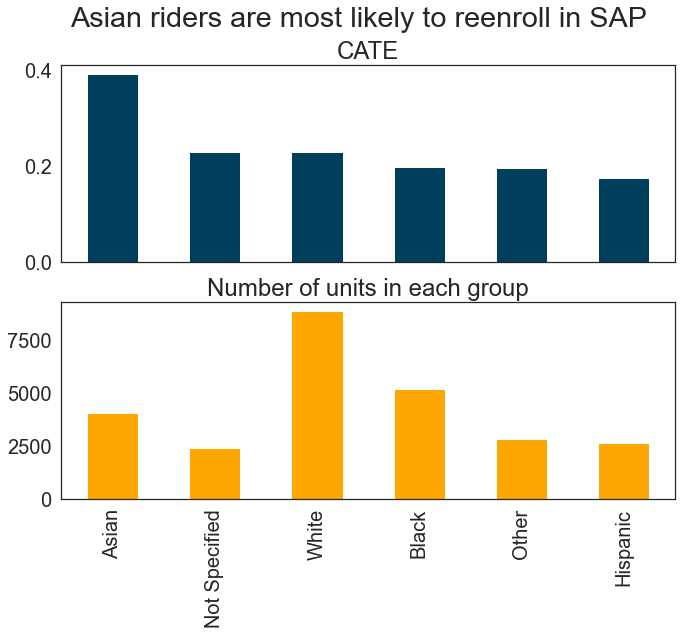

In [17]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

NameError: name 'gs' is not defined

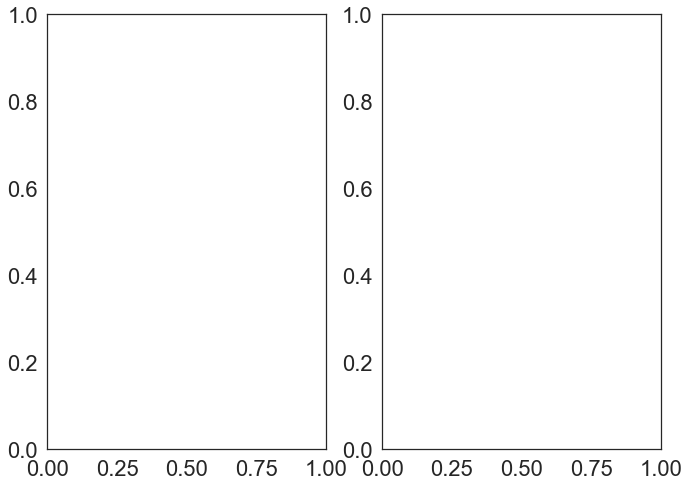

In [18]:
sns.set_theme(style="white", font_scale=2)


figure, axes = plt.subplots(1, 2)


df = df_dic['RaceDesc']
df = df.rename(index=dic_race_rename)
df = df.sort_values('CATE', ascending=False)

df[['CATE']].plot.bar(rot=0, 
                      fontsize = 20, 
                      legend=False, 
                      color='#003F5C', 
                      ax = gs[0])
df[['Counts']].plot.bar(rot=0,
                        fontsize = 20, 
                        legend=False, 
                        color='#003F5C', 
                        ax = gs[1])

<AxesSubplot:>

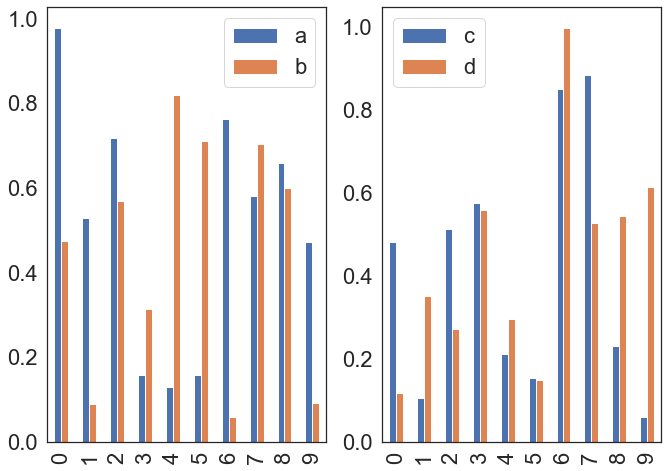

In [19]:
df = pd.DataFrame(np.random.rand(10, 4),
                  columns=['a', 'b', 'c', 'd'])

fig, axes = plt.subplots(nrows=1, ncols=2)
df[["a","b"]].plot(ax=axes[0], kind='bar')
df[["c", "d"]].plot(ax=axes[1], kind='bar')

In [25]:
from matplotlib import gridspec

df = df_dic['RaceDesc']
df = df.rename(index=dic_race_rename)
df = df.sort_values('CATE', ascending=False)

#fig, axes = plt.subplots(nrows=2, ncols=1)

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.5])

#axe = gs.ravel()

df[['CATE']].plot(rot=0, 
                      fontsize = 20, 
                      legend=False, 
                      color='#003F5C', 
                      ax = gs[0],
                 kind = 'bar')

df[['Counts']].plot.bar(rot=0,
                        fontsize = 20, 
                        legend=False, 
                        color='#003F5C', 
                        ax = gs[1])

AttributeError: 'SubplotSpec' object has no attribute 'get_figure'

In [32]:
df[['CATE']]

,CATE
Asian,0.392497
Not Specified,0.229950
White,0.229163
Black,0.198837
Other,0.195882
Hispanic,0.176620


In [33]:
df['CATE']

Asian            0.392497
Not Specified    0.229950
White            0.229163
Black            0.198837
Other            0.195882
Hispanic         0.176620
Name: CATE, dtype: float64

<AxesSubplot:>

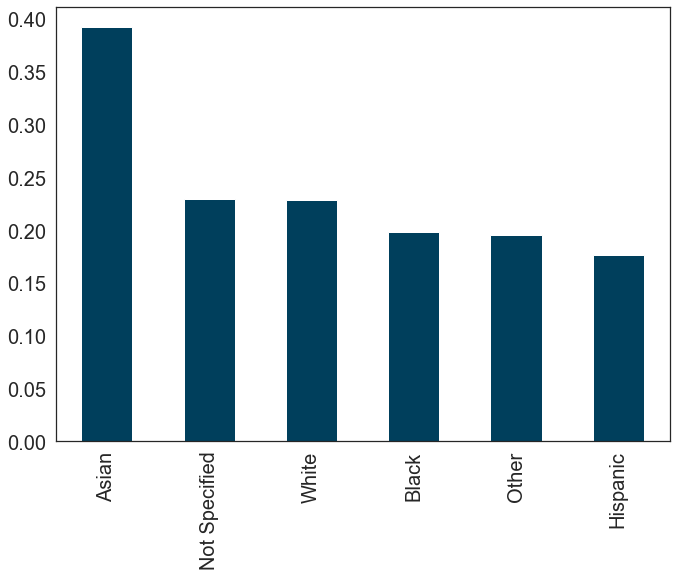

In [36]:
df[['CATE']].plot(fontsize = 20, 
                    legend=False, 
                    color='#003F5C', 
                    kind = 'bar')

<AxesSubplot:>

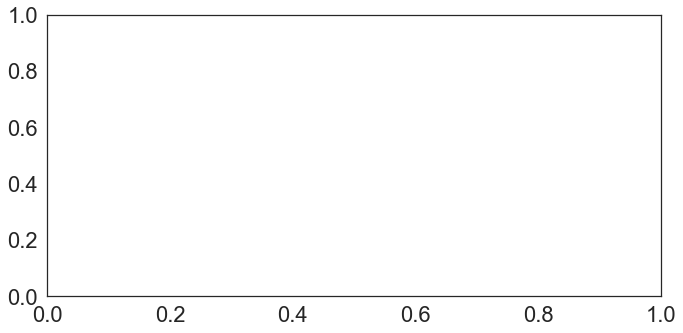

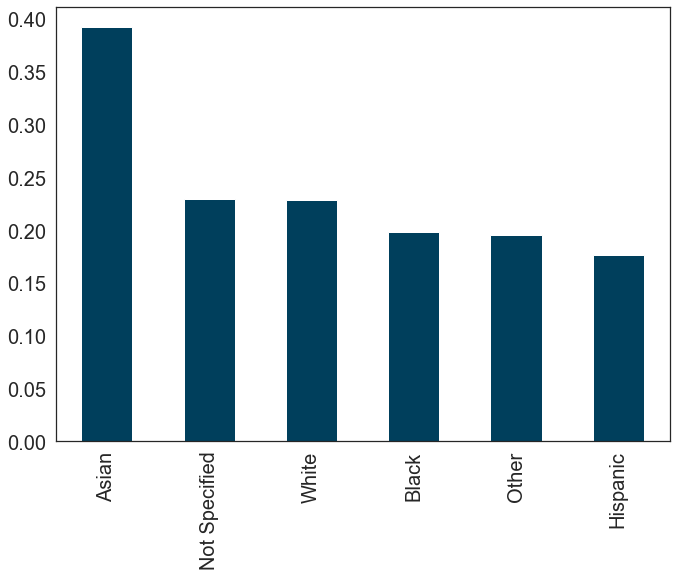

In [40]:
# 3 x 1 grid, position at (1st row, 1st col), take two rows
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
# plot something on this ax1
df[['CATE']].plot(fontsize = 20, 
                    legend=False, 
                    color='#003F5C', 
                    kind = 'bar')

# get the other ax
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan=1) 
df[['CATE']].plot(fontsize = 20, 
                    legend=False, 
                    color='#003F5C', 
                    kind = 'bar')

In [45]:
df.CATE.values

array([0.39249696, 0.22995017, 0.22916342, 0.1988365 , 0.19588165,
       0.17661959])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

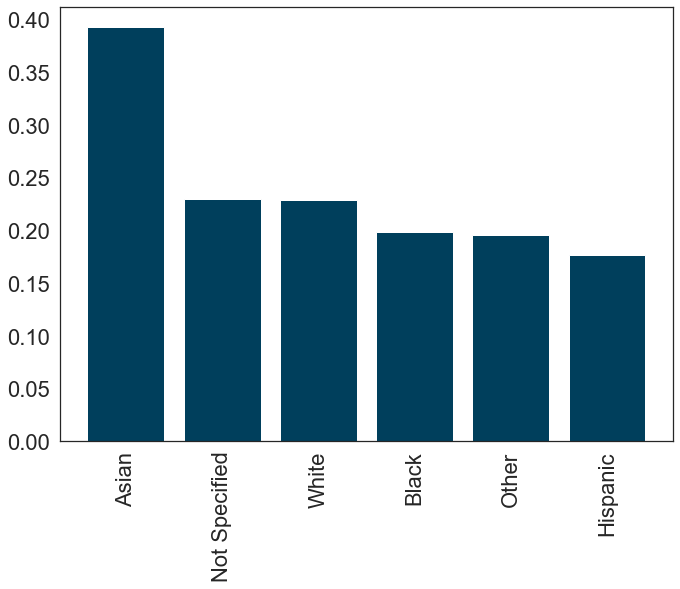

In [56]:
fig, ax = plt.subplots()
plt.bar(df[['CATE']].index, 
        df.CATE.values, 
        color='#003F5C')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees



<AxesSubplot:>

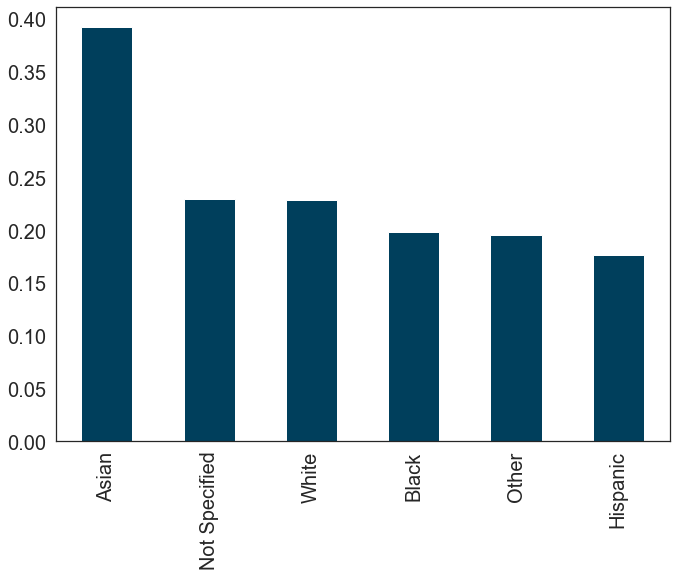

In [41]:
df[['CATE']].plot(fontsize = 20, 
                    legend=False, 
                    color='#003F5C', 
                    kind = 'bar')

In [116]:
df_dic['Agency']

,CATE,Counts,num_units_used
0,0.254077,14436,13347
1,0.222135,3871,3601
2,0.157051,2913,2855
3,0.298677,2224,2188
4,0.267191,1448,1331
5,0.192169,1154,1034


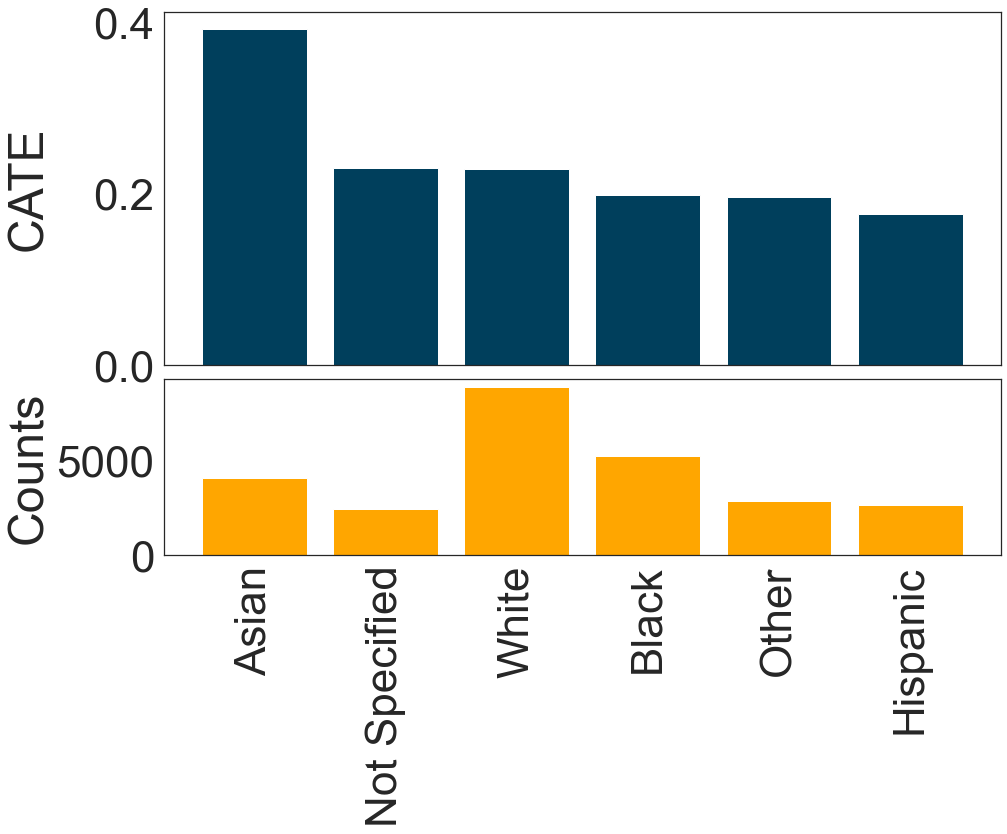

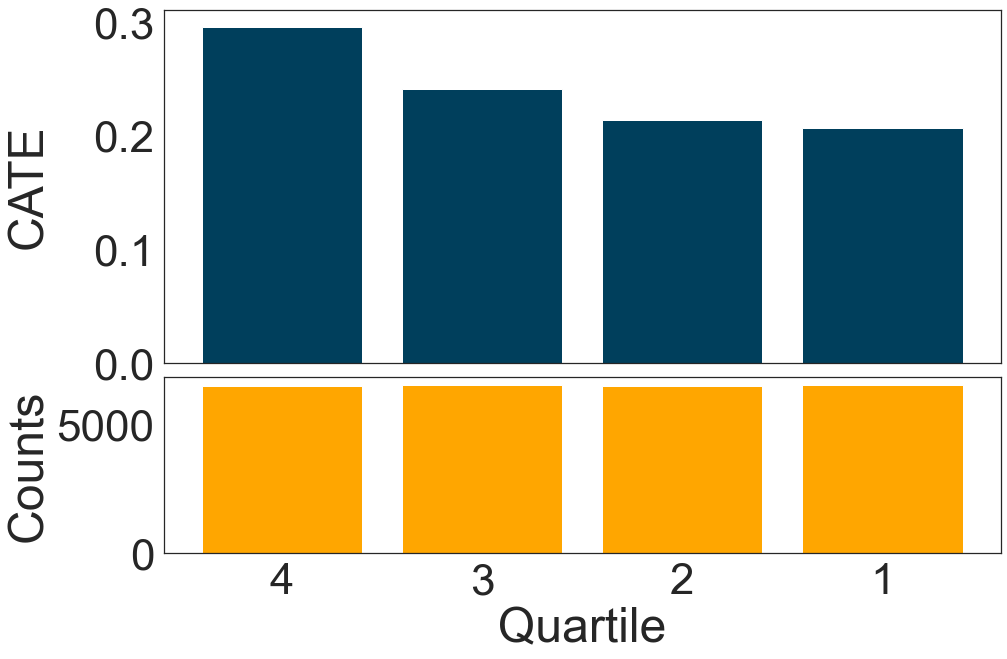

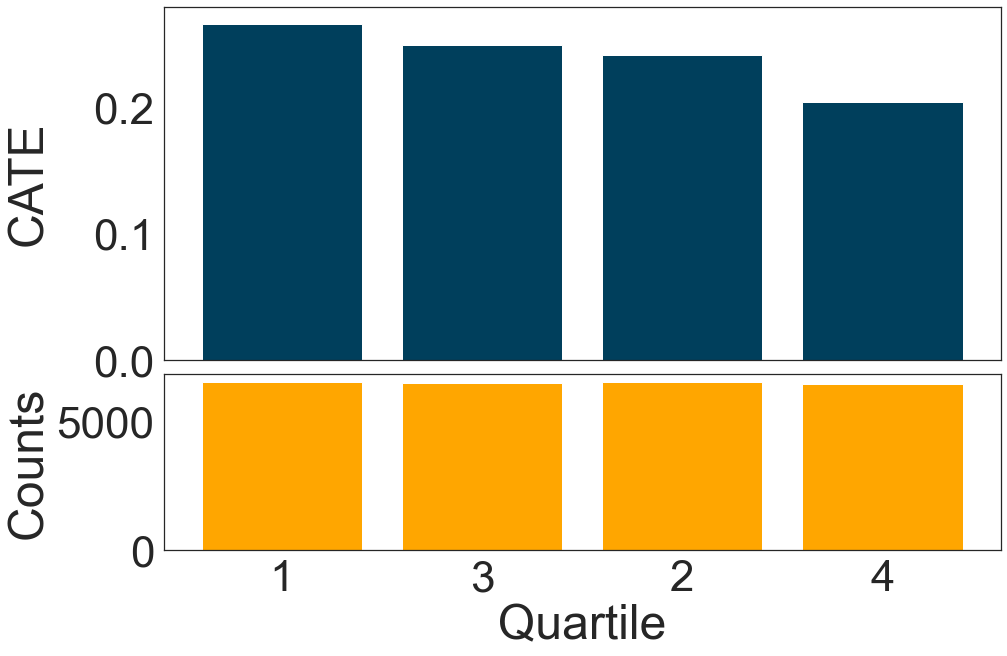

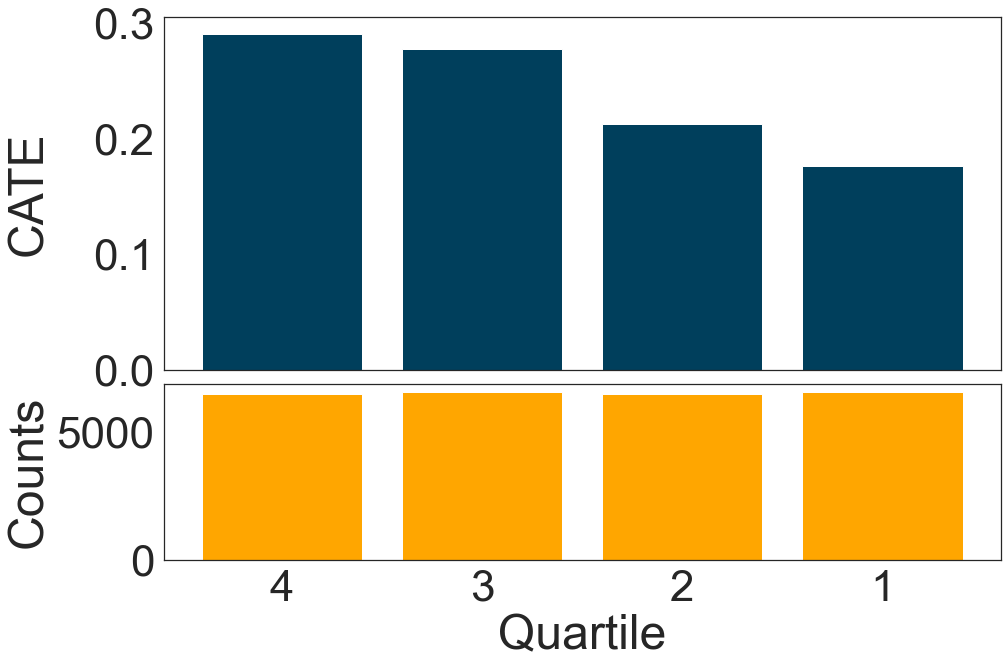

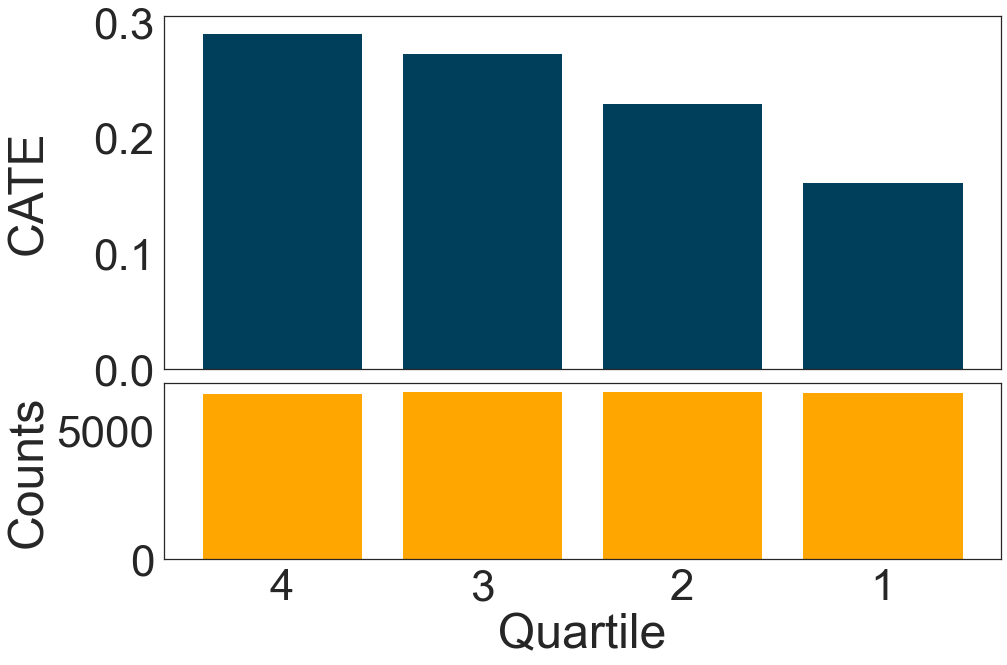

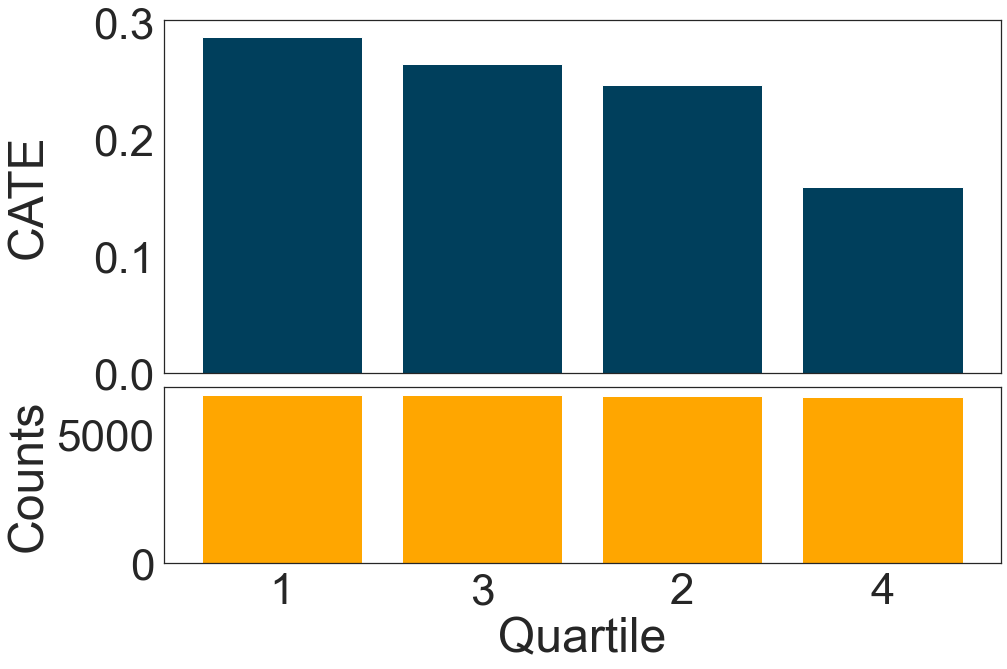

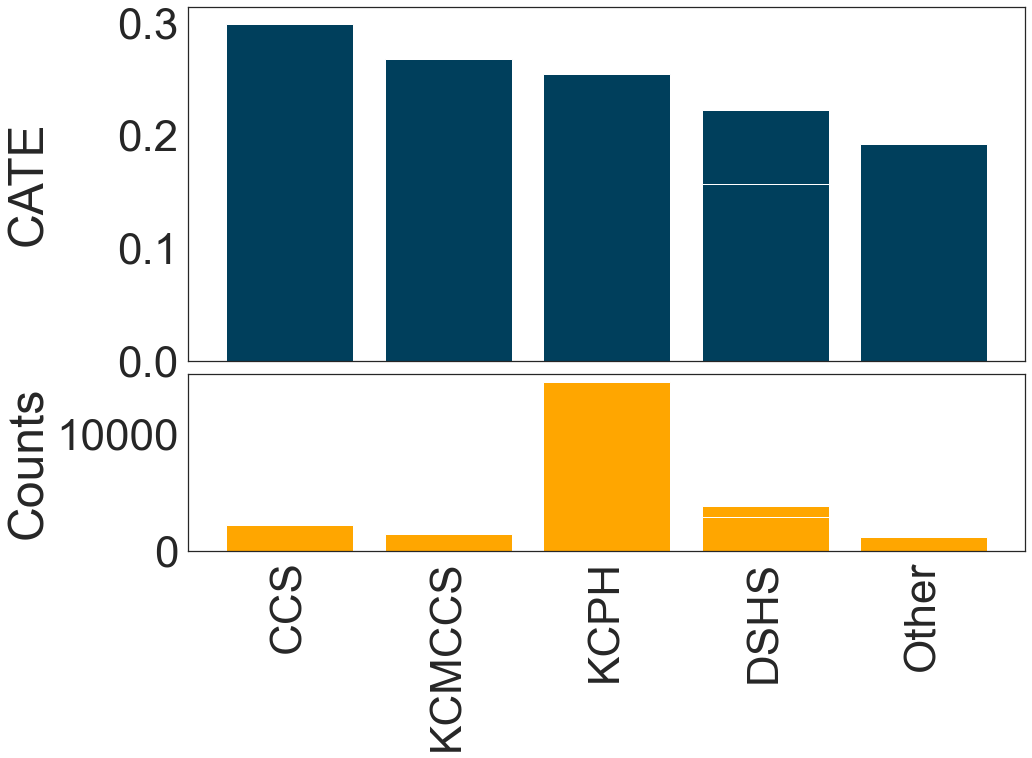

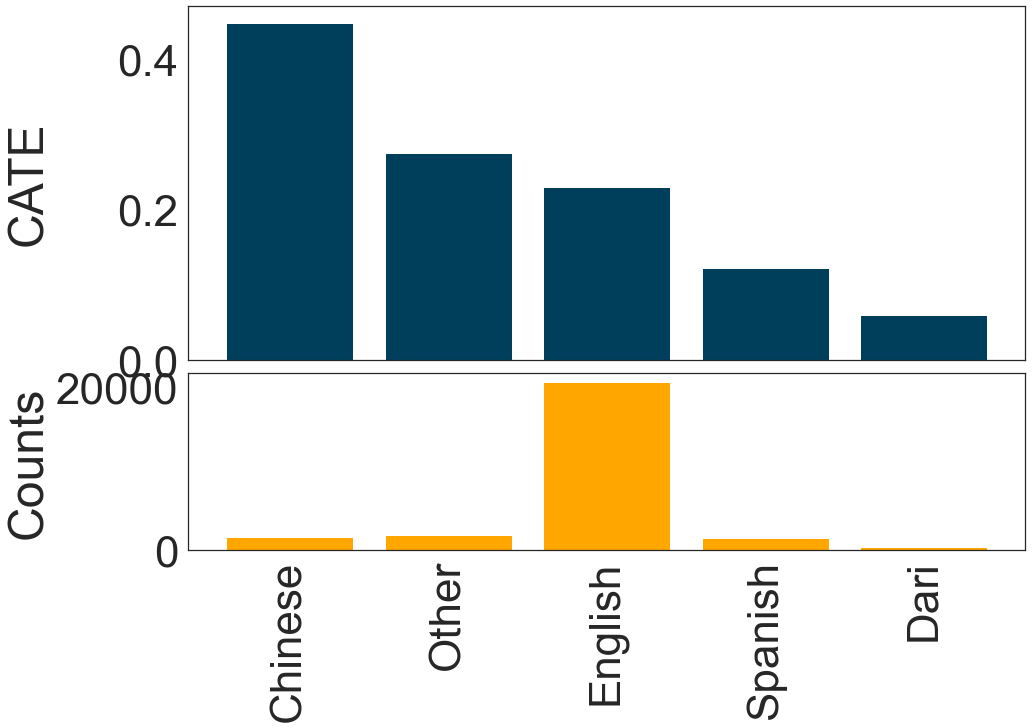

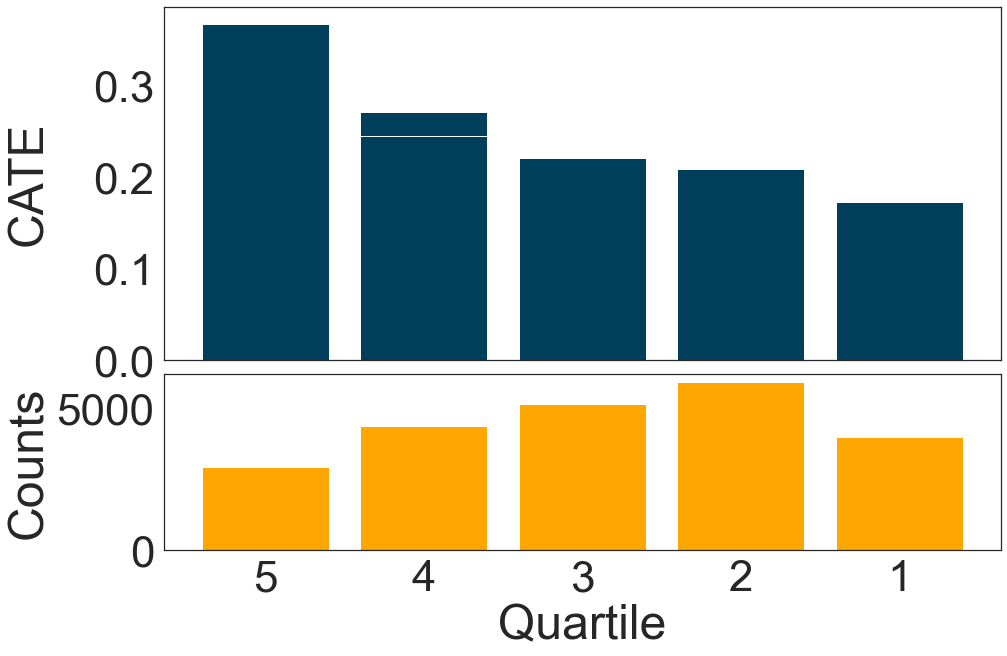

In [123]:
from matplotlib import gridspec
def plot_column_CATE_v2(covariate = 'RaceDesc', response = 'Reenrollment'):
    """
    Plot CATEs and counts, 5-21-2022
    """
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

    df = df_dic[covariate]
    sns.set_theme(style="white", font_scale=4)
    df = df.sort_values('CATE', ascending=False)

    if covariate == 'RaceDesc': 
        dic_race_rename = {'0': 'White',
                    '1': 'Black',
                    '2': 'Asian',
                    '3': 'Hispanic',
                    '4': 'Not Specified',
                    '5': 'Other',
                    '6': 'American Indian',
                    '7': 'Multi-Racial',
                    '8': 'Pacific Islander',
                    '*': 'Umatched'}
        df = df.rename(index=dic_race_rename)

    elif covariate == 'Language':
        dic_language_rename = {"0":"English", 
                               "1":"Chinese", 
                               "2":"Spanish", 
                               "3":"Dari", 
                               "4":"Vietnamese", 
                               "5":'Other'}
        df = df.rename(index=dic_language_rename)

    elif covariate == 'Agency':
        dic_agency_rename = {"0":"KCPH", 
             "1":"DSHS", 
             "2":"DSHS", 
             "3":"CCS", 
             "4":"KCMCCS", 
             "5":'Other'}
        df = df.rename(index=dic_agency_rename)
    else: 
        df = df.rename(index={"0":"1",
                    "1":"2",
                    "2":"3",
                    "3":"4"})
        

    ax0 = plt.subplot(gs[0])
    ax0.bar(df[['CATE']].index, 
            df.CATE.values, 
            color='#003F5C')
    plt.xticks([], [])
    plt.ylabel('CATE')

    ax1 = plt.subplot(gs[1])
    ax1.bar(df[['Counts']].index, 
            df.Counts.values, 
            color='#FFA600')
    plt.ylabel('Counts')
    
    
    if covariate in ['RaceDesc', 'Language', 'Agency']:
        plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    else: 
        plt.xlabel('Quartile')
        
    gs.update(hspace=0.05) # set the spacing between axes. 

    #plt.suptitle('Asian riders are most likely to reenroll in SAP')
    fig.align_ylabels([ax0, ax1])
    #plt.tight_layout()
    plt.savefig('/Users/albertsun/Projects/artifacts/reenrollment/' + covariate + '.pdf',
               bbox_inches='tight')
    
cols = ['RaceDesc','OverallJobAccess_quantileNum_4q','lowwagelaborforce_quantileNum_4q',
        'Access30Transit_quantileNum_4q','Access30Transit_ts_quantileNum_4q','spatialmismatch_quantileNum_4q',
        'Agency','Language','Age_bin']

for col in cols: 
    plot_column_CATE_v2(covariate = col, response = 'Reenrollment')

In [120]:
for col in sorted(cols):
    print('Reenrollment/' + col + '.pdf')

Reenrollment/Access30Transit_quantileNum_4q.pdf
Reenrollment/Access30Transit_ts_quantileNum_4q.pdf
Reenrollment/Age_bin.pdf
Reenrollment/Agency.pdf
Reenrollment/Language.pdf
Reenrollment/OverallJobAccess_quantileNum_4q.pdf
Reenrollment/RaceDesc.pdf
Reenrollment/lowwagelaborforce_quantileNum_4q.pdf
Reenrollment/spatialmismatch_quantileNum_4q.pdf


In [113]:
df_dic['Access30Transit_ts_quantileNum_4q']

,CATE,Counts,num_units_used
0,0.161602,6513,6087
1,0.230290,6528,5687
2,0.273719,6537,6227
3,0.291034,6468,6355


In [99]:
cols = ['RaceDesc','OverallJobAccess_quantileNum_4q','lowwagelaborforce_quantileNum_4q',
        'Access30Transit_quantileNum_4q','Access30Transit_ts_quantileNum_4q','spatialmismatch_quantileNum_4q',
        'Agency','Language','Age_bin']

for col in cols: 
    print(col)

RaceDesc
OverallJobAccess_quantileNum_4q
lowwagelaborforce_quantileNum_4q
Access30Transit_quantileNum_4q
Access30Transit_ts_quantileNum_4q
spatialmismatch_quantileNum_4q
Agency
Language
Age_bin


In [98]:
df_dic.keys()

dict_keys(['RaceDesc', 'OverallJobAccess_quantileNum_4q', 'lowwagelaborforce_quantileNum_4q', 'Access30Transit_quantileNum_4q', 'Access30Transit_ts_quantileNum_4q', 'spatialmismatch_quantileNum_4q', 'Agency', 'Language', 'Age_bin'])

In [ ]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(2, 1, height_ratios=[1.5, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0 = 

In [ ]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['Access30Transit_quantileNum_4q'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

# change quartile values from [0, 1, 2, 3] to [1, 2, 3, 4]
df = df.rename(index={"0":"1",
                    "1":"2",
                    "2":"3",
                    "3":"4"})

#df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])
plt.xlabel('\"Access to Transit\" Quartiles')


plt.suptitle('Riders with greater access to transit \nare more likely to reenroll in SAP', y=1.05)
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'Access30Transit_quantileNum_4q' + '.pdf', bbox_inches='tight')



In [ ]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False, color=['#003F5C', '#FFA600'])

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

In [ ]:
plt.rcParams["figure.figsize"] = (11,8)
df = df_dic['RaceDesc'][['CATE', 'Counts']]
df = df.rename(columns={"Counts": "Number of units in each group"})

df = df.rename(index=dic_race_rename)
sns.set_theme(style="white", font_scale=2)
df = df.sort_values('CATE', ascending=False)
df.plot.bar(rot=0, subplots=True, fontsize = 20, legend=False)

plt.suptitle('Asian riders are most likely to reenroll in SAP')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig(artifacts_filepath + response_var + '_' + 'RaceDesc' + '.pdf')

### Creating Figure Displaying Match Group Size vs. Covariates Matched on.

<ipython-input-16-9d330d07b181>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


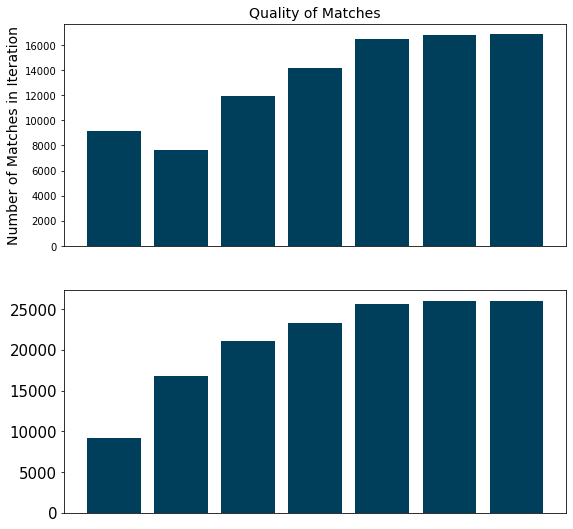

In [16]:
x = ["NONE", "AGENCY", '+AGE', '+RACE', '+Language', '+Access30Transit', '+lowwagelaborforce']
y1 = [9130, 7614, 11950, 14126, 16455, 16815, 16854] 
y2 = [9130, 16744, 21080, 23256, 25585, 25945, 25984]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

# ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)

In [17]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

0.24213574534145804

In [ ]:
# As we can see, the ATE is slightly positive, 
# implying that the subsidized annual pass (SAP) causes an enroller 
# to enroll more than non-SAP recipients by this many more times.

In [21]:
group1 = model_flame_AMT.units_per_group[2]
s_mmg = match_all.loc[group1]
s_mmg # each row of group 1.

,RaceDesc,SAP,count_enroll,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
4011,0,0,1,3,1,1,1,0,0,0,0
4012,0,0,1,3,1,1,1,0,0,0,0
4017,0,1,2,3,1,1,1,0,0,0,0
9717,0,0,1,3,1,1,1,0,0,0,0
19312,0,0,1,3,1,1,1,0,0,0,0
23157,0,0,1,3,1,1,1,0,0,0,0
24052,0,1,1,3,1,1,1,0,0,0,0


In [22]:
s_mmg.iloc[0]["RaceDesc"] == 0 # color all group numbers of this group.

True

In [23]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name and dataframe are specified below 
    (make sure to change for different models and dataframe).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)


In [24]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out 

### Scatter Plot Displaying CATES of re-enrollment

In [25]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.23688244249823137 0.2473890481846826


Text(0, 0.5, 'CATE')

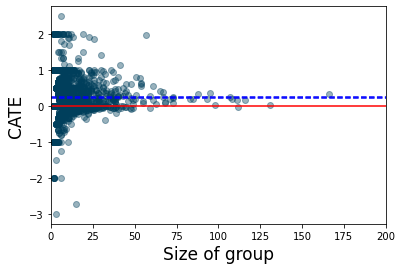

In [26]:
plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='b', linestyle='--')
plt.axhline(y=ub, color='b', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter_enrollment.pdf', bbox_inches="tight")

In [27]:
# Here are the corresponding codes for race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

In [28]:
## Conf. Interval
## Conf. Interval for Matched groups with Asian Individuals
cate_lst = create_cate_lst(size_asian, cate_asian)

mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.3943904544861207 0.4252307117676056


Text(0, 0.5, 'CATE')

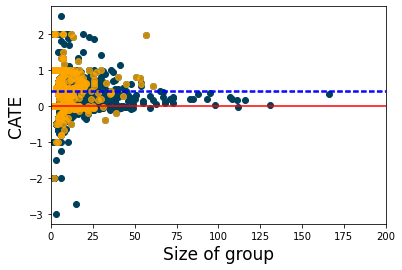

In [30]:
# Scatterplot Displaying the CATE of matched groups with Asian Individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_enroll.pdf', bbox_inches="tight")

### Scatter for AccesstoTransit

In [31]:
# Calculate the quantiles for Lowest transit Quantile.
(size, cate_all, in_trans1, size_trans1, cate_trans1) = create_df_scatter("Access30Transit_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_trans1, cate_trans1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.16575335845133699 0.1752422040514177 0.1847310496514984


Text(0, 0.5, 'CATE')

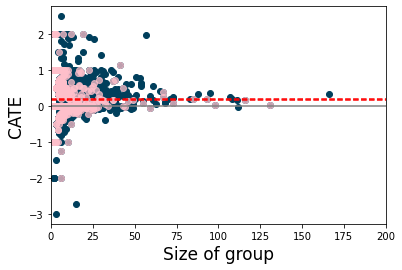

In [32]:
# Scatterplot Displaying the CATE of matched groups with transit1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans1, cate_trans1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans1_enroll.pdf', bbox_inches="tight")

In [33]:
# Calculate the quantiles for Highest transit quantile.
(size, cate_all, in_trans3, size_trans3, cate_trans3) = create_df_scatter("Access30Transit_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_trans3, cate_trans3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.30439171112532726 0.31492923438392384 0.3254667576425204


Text(0, 0.5, 'CATE')

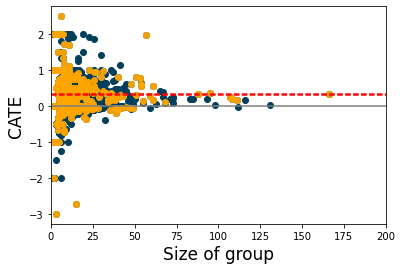

In [34]:
# Scatterplot Displaying the CATE of matched groups with transit3 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans3, cate_trans3, c = "#ffa600", alpha=0.95)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans3_enroll.pdf', bbox_inches="tight")

In [43]:
# For each unit, we can see a table displaying the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched[:10]

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,3,3,3,3,2,*,0,*
1,1,3,3,3,3,2,*,0,*
2,1,3,3,3,3,2,3,0,3
3,0,3,3,3,3,2,3,0,4
4,1,3,3,3,3,2,3,0,2
5,0,3,3,3,3,2,3,0,3
6,1,3,3,3,3,2,0,0,3
7,1,3,3,3,3,2,0,0,4
8,0,3,3,3,3,2,*,5,*
9,1,3,3,3,3,2,3,0,3


### Scatter for OverallJobAccess

In [38]:
# Calculate the quantiles for Lowest Overall Job Access Quantile.
(size, cate_all, in_Ja1, size_Ja1, cate_Ja1) = create_df_scatter("OverallJobAccess_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_Ja1, cate_Ja1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.16928629364170067 0.17896728805162826 0.18864828246155585


Text(0, 0.5, 'CATE')

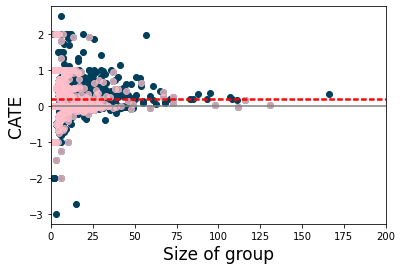

In [39]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja1, cate_Ja1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja1_enroll.pdf', bbox_inches="tight")

In [40]:
# Calculate the quantiles for Highest Overall Job Access Quantile.
(size, cate_all, in_Ja3, size_Ja3, cate_Ja3) = create_df_scatter("OverallJobAccess_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_Ja3, cate_Ja3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.3127118471222903 0.32296071470868726 0.33320958229508424


Text(0, 0.5, 'CATE')

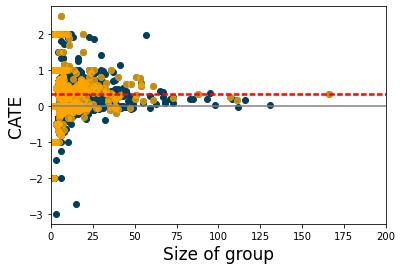

In [41]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja3, cate_Ja3, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja3_enroll.pdf', bbox_inches="tight")

# Exact Matching

In [6]:
# Matching on all 9 covariates in the dataset.
model_flame_EX = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=1, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)


In [7]:
model_flame_EX.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_EX = model_flame_EX.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
9130 units matched. We stopped before doing iteration number:  1


In [8]:
# ATE Overall Using Exacxt Matching.
ate_6 = dame_flame.utils.post_processing.ATE(model_flame_EX)
ate_6 # 0.304

0.3042368978425022

In [14]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name is specified below (make sure to change for different models).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_EX.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [15]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub) 

0.29334508716879304 0.3151287085162162


The ATE results from exact matching are 0.30 [0.29 0.32].